# Final Project

# Abstract

In this report, we will try to predict if the previous year's draft can help us determine if a position on a certain team will be in the top 90th percentile of points in the upcoming year. To do this we will use NFL fantasy points data and NFL Draft data to determine as such. In our process we will manipulate the data to remove any potential predictor besides draft position and previous years points, merge different data, and create needed variables. In order to come to a proper conclusion, we will define that our goal is not about overall accuracy rather situational accuracy in taking more risks to pick more impactful players. This will be done through 3 different models and tactics such as SMOTE and scaling. In the end, we will see that there are ways to improve this situational accuracy at the cost of overall accuracy using a SMOTE scaled Logistic Regression.

# Introduction

Money is something that everyone strives to constantly accumulate. Money can lead to a happier life and one full of enjoyment. Because of this society has come up with many different ways to get money. One of the ways that people get money is by gambling. This source of income is becoming more and more popular in the USA with many states slowly legalizing gambling. Another area in the USA which has grown in popularity is the fantasy sports industry. These two growing industries have given the idea to many companies to combine them in order to create a product for the consumers. Companies such as Yahoo, DraftKings, FanDuel and many more have created fantasy sports competitions, with many different formats, all though revolving around the idea that you can choose players and win life changing money.

<br>

Our goal with this project is to see if we can use NFL data to give us an edge in these fantasy sport gambling competitions. While there are many ways one may be able to leverage data to gain an edge, our question we will try to answer is **" Can the previous year's NFL Draft be used to predict if that player's position on the team will be in the top 90th percentile in fantasy points scored?"** For example, when the Arizona Cardinals drafted Kyler Murray in the first Round of the 2019 Draft, they went from being outside the 90th percentile of QB points to inside the 90th percentile. Was this a jump in percentile something that can be attributed to the draft and can be replicated across multiple years, or does it have nothing to do with who and where players were drafted?

<br>

The data we will be using in our analysis is from https://www.pro-football-reference.com/draft/ and https://fantasydata.com/nfl/. We will use Fantasydata.com's CSVs for each players fantasy points production in a season and ProFootball Reference to scrape each seasons NFL Draft. The draft data will help us see what position a player is, what round they were drafted in, and what team they were drafted to, while the fantasy points data will help us in deciphering which teams/positions were in the 90th percentile.

<br>

In order to answer the question at hand we will need to use multiple data manipulation techniques, such as data frame merging and concatenation, creation of variables based on domain knowledge and the use of different predictive models with proper data set-up like Over-Sampling and variable scaling. 

In [1]:
# Import Packages for Scraping and EDA
import urllib.request
import bs4 as bs
import regex as re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Fantasy Data
FData20 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/Data%202020.csv')
FData19 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/2019%20Data.csv')
FData18 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/2018%20Data.csv')
FData17 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/2017%20Data.csv')
FData16 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/2016%20Data.csv')
FData15 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/2015%20Data.csv')
FData14 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/2014%20Data.csv')
FData13 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/2013%20Data.csv')
FData12 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/2012%20Data.csv')
FData11 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/Data%202011.csv')
FData10 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/2010%20Data.csv')
FData09 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/2009%20Data.csv')
FData08 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/2008%20Data.csv')
FData07 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/2007%20Data.csv')
FData06 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/2006%20Data.csv')
FData05 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/Data%202005.csv')
FData04 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/Data%202004.csv')
FData03 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/Data%202003.csv')
FData02 = pd.read_csv('https://raw.githubusercontent.com/DovieSolo/DAV-5400/main/Data%202002.csv')

# Read urls for scrapping
r2020 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2020/draft.htm').read()
r2019 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2019/draft.htm').read()
r2018 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2018/draft.htm').read()
r2017 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2017/draft.htm').read()
r2016 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2016/draft.htm').read()
r2015 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2015/draft.htm').read()
r2014 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2014/draft.htm').read()
r2013 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2013/draft.htm').read()
r2012 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2012/draft.htm').read()
r2011 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2011/draft.htm').read()
r2010 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2010/draft.htm').read()
r2009 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2009/draft.htm').read()
r2008 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2008/draft.htm').read()
r2007 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2007/draft.htm').read()
r2006 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2006/draft.htm').read()
r2005 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2005/draft.htm').read()
r2004 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2004/draft.htm').read()
r2003 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2003/draft.htm').read()
r2002 = urllib.request.urlopen('https://www.pro-football-reference.com/years/2002/draft.htm').read()

# Research Approach

To start answering the research question, we first needed to load the our data into our Jupyter notebook. Since we are using two different types of data (CSV and web-scrapped) we will use Beautiful Soup package to scrape the data and the pandas package to load the CSV.

<br>

After all the data is loaded, we will then need to check for any missing data and if there is identify where so that we can decide what to do with it. In our case, entire rows were blank, so we removed all the rows with missing data. Next, we will do a basic EDA on our data to see if anything stands out, in either a positive or negative way. Some of the charts we generate are box plots, (to check for points scored outliers), a scatter plots, (to visualize where all the points fit in respect to rank) and bar plots, (to help us understand the data as a whole). Once everything is known about the data in the basic form, we will need to clean and prep it for our analysis.

<br>

The first step in our cleaning process is to drop any unnecessary data. Since our hypothesis revolves around draft position and total fantasy points, we will remove anything else that is not in those categories. Once that is done, we will add our own variables based off domain knowledge that will help us merge the data frames together as well as create a binary response variable. Our last step in our prep will be to merge the data and make sure any variable that may be misspelled is fixed so we have one cleaned and final data frame for analysis.

<br>

For our analysis we will be using 3 different models, Logistic Regression, Classifier Decision Trees, and KNN to see if we can predict whether a team's draft will lead to top production in specific positions. After running the models in the basic form, we will attempt to improve it more with SMOTE and data scaling in each one of these three models. Finally, due to the nature of our goal, we will use a confusion matrix to help explain what model is the best to use. While many models are used for raw accuracy, our case is all about taking the right risks. The goal of fantasy football is to get the ceiling points more than the 
rest of the field, therefore, it is better to focus on the accuracy of finding the significant players than correctly identifying the ones that dud.

# Exploratory Data Analysis

Before creating one data frame, we will first need to find what data to incorporate and make sure the data we are using makes sense. This begins with first importing the data into a useable format. This is done with Beautiful Soup to parse the HTML from the webpage and pandas to read the CSVs.

## EDA - Import Data

Each webpage has a built-in table, so we will need only that data. Not included in the table is the rounds the player was drafted in. Since this is very important data, we will need to pull that out and store it as a variable so that we can use it later. Lastly, we will create a list of all the data frames so that we can loop through all the data at a faster pace.

In [2]:
# Load them into Soup
soup2020 = bs.BeautifulSoup(r2020,'lxml')
soup2019 = bs.BeautifulSoup(r2019,'lxml')
soup2018 = bs.BeautifulSoup(r2018,'lxml')
soup2017 = bs.BeautifulSoup(r2017,'lxml')
soup2016 = bs.BeautifulSoup(r2016,'lxml')
soup2015 = bs.BeautifulSoup(r2015,'lxml')
soup2014 = bs.BeautifulSoup(r2014,'lxml')
soup2013 = bs.BeautifulSoup(r2013,'lxml')
soup2012 = bs.BeautifulSoup(r2012,'lxml')
soup2011 = bs.BeautifulSoup(r2011,'lxml')
soup2010 = bs.BeautifulSoup(r2010,'lxml')
soup2009 = bs.BeautifulSoup(r2009,'lxml')
soup2008 = bs.BeautifulSoup(r2008,'lxml')
soup2007 = bs.BeautifulSoup(r2007,'lxml')
soup2006 = bs.BeautifulSoup(r2006,'lxml')
soup2005 = bs.BeautifulSoup(r2005,'lxml')
soup2004 = bs.BeautifulSoup(r2004,'lxml')
soup2003 = bs.BeautifulSoup(r2003,'lxml')
soup2002 = bs.BeautifulSoup(r2002,'lxml')

# Find the Table
table20 = soup2020.find('table')
table19 = soup2019.find('table')
table18 = soup2018.find('table')
table17 = soup2017.find('table')
table16 = soup2016.find('table')
table15 = soup2015.find('table')
table14 = soup2014.find('table')
table13 = soup2013.find('table')
table12 = soup2012.find('table')
table11 = soup2011.find('table')
table10 = soup2010.find('table')
table09 = soup2009.find('table')
table08 = soup2008.find('table')
table07 = soup2007.find('table')
table06 = soup2006.find('table')
table05 = soup2005.find('table')
table04 = soup2004.find('table')
table03 = soup2003.find('table')
table02 = soup2002.find('table')

# Find the column of Round player was picked
rows20 = table20.find_all('th', class_ = 'right')
rows19 = table19.find_all('th', class_ = 'right')
rows18 = table18.find_all('th', class_ = 'right')
rows17 = table17.find_all('th', class_ = 'right')
rows16 = table16.find_all('th', class_ = 'right')
rows15 = table15.find_all('th', class_ = 'right')
rows14 = table14.find_all('th', class_ = 'right')
rows13 = table13.find_all('th', class_ = 'right')
rows12 = table12.find_all('th', class_ = 'right')
rows11 = table11.find_all('th', class_ = 'right')
rows10 = table10.find_all('th', class_ = 'right')
rows09 = table09.find_all('th', class_ = 'right')
rows08 = table08.find_all('th', class_ = 'right')
rows07 = table07.find_all('th', class_ = 'right')
rows06 = table06.find_all('th', class_ = 'right')
rows05 = table05.find_all('th', class_ = 'right')
rows04 = table04.find_all('th', class_ = 'right')
rows03 = table03.find_all('th', class_ = 'right')
rows02 = table02.find_all('th', class_ = 'right')

## Find the round only
Round20 = []
for i in rows20:
    Round20.append(i.text)
Round19 = []
for i in rows19:
    Round19.append(i.text)
Round18 = []
for i in rows18:
    Round18.append(i.text)
Round17 = []
for i in rows17:
    Round17.append(i.text)
Round16 = []
for i in rows16:
    Round16.append(i.text)
Round15 = []
for i in rows15:
    Round15.append(i.text)
Round14 = []
for i in rows14:
    Round14.append(i.text)
Round13 = []
for i in rows13:
    Round13.append(i.text)
Round12 = []
for i in rows12:
    Round12.append(i.text)
Round11 = []
for i in rows11:
    Round11.append(i.text)
Round10 = []
for i in rows10:
    Round10.append(i.text)
Round09 = []
for i in rows09:
    Round09.append(i.text)
Round08 = []
for i in rows08:
    Round08.append(i.text)
Round07 = []
for i in rows07:
    Round07.append(i.text)
Round06 = []
for i in rows06:
    Round06.append(i.text)
Round05 = []
for i in rows05:
    Round05.append(i.text)
Round04 = []
for i in rows04:
    Round04.append(i.text)
Round03 = []
for i in rows03:
    Round03.append(i.text)
Round02 = []
for i in rows02:
    Round02.append(i.text)
    
### Convert to a DF
RDF20 = pd.DataFrame(Round20)
RDF19 = pd.DataFrame(Round19)
RDF18 = pd.DataFrame(Round18)
RDF17 = pd.DataFrame(Round17)
RDF16 = pd.DataFrame(Round16)
RDF15 = pd.DataFrame(Round15)
RDF14 = pd.DataFrame(Round14)
RDF13 = pd.DataFrame(Round13)
RDF12 = pd.DataFrame(Round12)
RDF11 = pd.DataFrame(Round11)
RDF10 = pd.DataFrame(Round10)
RDF09 = pd.DataFrame(Round09)
RDF08 = pd.DataFrame(Round08)
RDF07 = pd.DataFrame(Round07)
RDF06 = pd.DataFrame(Round06)
RDF05 = pd.DataFrame(Round05)
RDF04 = pd.DataFrame(Round04)
RDF03 = pd.DataFrame(Round03)
RDF02 = pd.DataFrame(Round02)

### Find the player data
playerdata20=[]
tds = table20.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata20.append([j.text for j in tabledata])    
playerdata20 = playerdata20[2:len(playerdata20)]
playerdata19=[]
tds = table19.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata19.append([j.text for j in tabledata])    
playerdata19 = playerdata19[2:len(playerdata19)]
playerdata18=[]
tds = table18.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata18.append([j.text for j in tabledata])    
playerdata18 = playerdata18[2:len(playerdata18)]
playerdata17=[]
tds = table17.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata17.append([j.text for j in tabledata])    
playerdata17 = playerdata17[2:len(playerdata17)]
playerdata16=[]
tds = table16.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata16.append([j.text for j in tabledata])    
playerdata16 = playerdata16[2:len(playerdata16)]
playerdata15=[]
tds = table15.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata15.append([j.text for j in tabledata])    
playerdata15 = playerdata15[2:len(playerdata15)]
playerdata14=[]
tds = table14.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata14.append([j.text for j in tabledata])    
playerdata14 = playerdata14[2:len(playerdata14)]
playerdata13=[]
tds = table13.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata13.append([j.text for j in tabledata])    
playerdata13 = playerdata13[2:len(playerdata13)]
playerdata12=[]
tds = table12.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata12.append([j.text for j in tabledata])    
playerdata12 = playerdata12[2:len(playerdata12)]
playerdata11=[]
tds = table11.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata11.append([j.text for j in tabledata])    
playerdata11 = playerdata11[2:len(playerdata11)]
playerdata10=[]
tds = table10.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata10.append([j.text for j in tabledata])    
playerdata10 = playerdata10[2:len(playerdata10)]
playerdata09=[]
tds = table09.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata09.append([j.text for j in tabledata])    
playerdata09 = playerdata09[2:len(playerdata09)]
playerdata08=[]
tds = table08.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata08.append([j.text for j in tabledata])    
playerdata08 = playerdata08[2:len(playerdata08)]
playerdata07=[]
tds = table07.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata07.append([j.text for j in tabledata])    
playerdata07 = playerdata07[2:len(playerdata07)]
playerdata06=[]
tds = table06.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata06.append([j.text for j in tabledata])    
playerdata06 = playerdata06[2:len(playerdata06)]
playerdata05=[]
tds = table05.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata05.append([j.text for j in tabledata])    
playerdata05 = playerdata05[2:len(playerdata05)]
playerdata04=[]
tds = table04.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata04.append([j.text for j in tabledata])    
playerdata04 = playerdata04[2:len(playerdata04)]
playerdata03=[]
tds = table03.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata03.append([j.text for j in tabledata])    
playerdata03 = playerdata03[2:len(playerdata03)]
playerdata02=[]
tds = table02.find_all('tr')
for i in tds:
    tabledata = i.find_all('td')
    playerdata02.append([j.text for j in tabledata])    
playerdata02 = playerdata02[2:len(playerdata02)]

### Convert our Draft Arrays to DF
NAMES = ['Pick','Team','Player','Pos','Age','To','AP1','PB','St','CarAv','DrAV','G','Cmp','PAtt','PYds','PTD','Int','RAtt','RYds','RTD','Rec','RYds','RTD','Solo','Int','Sk','College','Stats']
Frame20 = pd.DataFrame(playerdata20, columns = NAMES)
Frame19 = pd.DataFrame(playerdata19, columns = NAMES)
Frame18 = pd.DataFrame(playerdata18, columns = NAMES)
Frame17 = pd.DataFrame(playerdata17, columns = NAMES)
Frame16 = pd.DataFrame(playerdata16, columns = NAMES)
Frame15 = pd.DataFrame(playerdata15, columns = NAMES)
Frame14 = pd.DataFrame(playerdata14, columns = NAMES)
Frame13 = pd.DataFrame(playerdata13, columns = NAMES)
Frame12 = pd.DataFrame(playerdata12, columns = NAMES)
Frame11 = pd.DataFrame(playerdata11, columns = NAMES)
Frame10 = pd.DataFrame(playerdata10, columns = NAMES)
Frame09 = pd.DataFrame(playerdata09, columns = NAMES)
Frame08 = pd.DataFrame(playerdata08, columns = NAMES)
Frame07 = pd.DataFrame(playerdata07, columns = NAMES)
Frame06 = pd.DataFrame(playerdata06, columns = NAMES)
Frame05 = pd.DataFrame(playerdata05, columns = NAMES)
Frame04 = pd.DataFrame(playerdata04, columns = NAMES)
Frame03 = pd.DataFrame(playerdata03, columns = NAMES)
Frame02 = pd.DataFrame(playerdata02, columns = NAMES)

# List of all Fantasy Points
AllFF = [FData20,FData19,FData18,FData17,FData16,FData15,FData14,FData13,FData12,FData11,FData10,FData09,FData08,FData07,FData06,FData05,FData04,FData03,FData02]
AllDD = [Frame20,Frame19,Frame18,Frame17,Frame16,Frame15,Frame14,Frame13,Frame12,Frame11,Frame10,Frame09,Frame08,Frame07,Frame06,Frame05,Frame04,Frame03,Frame02]
ALLRND = [Round20,Round19,Round18,Round17,Round16,Round15,Round14,Round13,Round12,Round11,Round10,Round09,Round08,Round07,Round06,Round05,Round04,Round03,Round02]

## EDA - Data Verification

Before doing any Data Analysis we need to make sure the data is fit for it. This means not missing any values. When checking for blank values we came across 6 entire rows with blank data throughout each Draft data frame. This was probably because in between each round there was a row with blank data. To solve this, we will drop each of those rows.

In [3]:
### Find if any are blank
for value in AllFF:
    print(value.isnull().sum())

for value in AllDD:
    print(value.isnull().sum())
    
### find the Empty Row in Draft Data
print("\nThese are the rows for Draft Data that has 0 data in it")
for i in range(0,len(Frame10)):
    if (Frame10.iloc[i])[5] == None: 
        print(i)
print("")        


Rank                    0
Name                    0
Team                    0
Position                0
Played                  0
PassingYards            0
PassingTouchdowns       0
PassingInterceptions    0
RushingYards            0
RushingTouchdowns       0
Receptions              0
ReceivingYards          0
ReceivingTouchdowns     0
Sacks                   0
Interceptions           0
FumblesForced           0
FumblesRecovered        0
FantasyPointsPerGame    0
FantasyPoints           0
dtype: int64
Rank                    0
Name                    0
Team                    0
Position                0
Played                  0
PassingYards            0
PassingTouchdowns       0
PassingInterceptions    0
RushingYards            0
RushingTouchdowns       0
Receptions              0
ReceivingYards          0
ReceivingTouchdowns     0
Sacks                   0
Interceptions           0
FumblesForced           0
FumblesRecovered        0
FantasyPointsPerGame    0
FantasyPoints           0

## EDA - Basic Analysis

Once we have all our cleaned data we want to see if there are any trends that we can identify that may be of use. The first thing we notice about our Draft data is the rate at which each position was drafted. For the most part:

- **WR: Around 30 per draft - Most offensive position**
- **DB: Around 45 per draft - Most drafted position**
- **QB: Around 10 per draft - Important position but chosen more selectively**
- **K, P, LS: Around 0 - 3 per draft - Specialty positions and not drafted often**

What is important to take away from here, is not really than the amount of drafted in a position, but rather that it is similar across all years. By establishing constants throughout time we can properly say that in the future it will be constant and thus, we can model for it.

This can also be applied to fantasy points scored throughout the years. The results of points is below:

- Min - Around negative 3 
- 25th percentile - Around 6.5 points
- 75th percentile - Around 75 to 80 points scored
- Max - Varies more - Around 350 to 400 depending on the year

While the Max points scored has a higher variance, that is because any player can have an outlier score in a given season. What is interesting to note is that the difference of points in the first quartile is around 9 points while from 75th to Max which is our goal to predict, is a whopping **300 points**. This follows our thesis that predicting top percentile of points scored is important and can help win the competition.

In [4]:
### Numeric Value of each postion drafted
print('These are the sum of each position totaled up in a given year ( 2020 - 2002 )')
for value in range(19):
    print(AllDD[value]['Pos'].value_counts())


### Describe Total Points per person
yr = 2020
for value in AllFF:
    print('DATA FOR YEAR:',str(yr))
    print('The min value is',value['FantasyPoints'].describe()[3],"points")
    print('The 25th Percentile is',value['FantasyPoints'].describe()[4],"points")
    print('The 75th value is',value['FantasyPoints'].describe()[6],"points")
    print('The max value is',value['FantasyPoints'].describe()[7],"points")
    print("")
    yr = yr -1

### TOTAL POINTS SCORED IN A SEASON
SeasonTotal = []
SeasonYr = []
count = 2020
for value in AllFF:
    SeasonTotal.append(value['FantasyPoints'].sum())
    SeasonYr.append(str(count))
    count = count - 1
PointsFrame = pd.DataFrame([SeasonYr,SeasonTotal])
PointsFrame = PointsFrame.T

These are the sum of each position totaled up in a given year ( 2020 - 2002 )
WR    35
LB    33
CB    26
S     24
T     22
DE    21
DT    20
RB    18
G     17
QB    13
TE    12
C      8
K      3
P      2
LS     1
Name: Pos, dtype: int64
CB    32
LB    32
WR    28
RB    25
DE    24
T     22
DT    21
S     20
TE    16
G     13
QB    11
C      5
P      2
K      2
LS     1
Name: Pos, dtype: int64
WR     34
CB     28
DE     22
DT     22
RB     21
T      21
S      18
TE     15
LB     14
QB     13
OLB    13
ILB    11
C       9
G       8
P       4
K       2
LS      1
Name: Pos, dtype: int64
WR     32
CB     27
RB     27
S      24
DT     20
DE     19
LB     18
T      15
TE     14
OLB    12
G      11
QB     10
C       6
DB      5
FB      3
K       3
ILB     2
DL      2
LS      1
OL      1
NT      1
Name: Pos, dtype: int64
WR     31
CB     31
OLB    21
DT     20
RB     20
DE     19
S      19
T      18
G      17
QB     15
TE     11
ILB    10
C       6
P       3
LB      3
NT      3
FB      3
LS    

## EDA - Graph the Data

An important part of any EDA is being able to visualize the data in a way that we can easily make inferences. Above we described some insight on the players drafted and fantasy points scored in a year per player, here we can see them in a graph form. Each player was given a rank corresponding to how many points they scored and when we graph that in response to total points scored, we can really see the importance of finding a top tier player as they score much more than even those in the 75th percentile.

<br>

Another few ideas I wanted to visualize is age of a draftee, point distribution amongst each position in a year, total draft picks per round, and total points scored in a year. Each of these graphs was produced in hopes of finding some potential correlation over years. 

<br>

#### Age Graph:
We can see from these graphs that each season the age of players drafted can vary immensely with some years 22 being a heavy front runner and some years 21 being that. Also, there are many players without an age inputted. Because of the inconsistency this will not be a variable used in our testing.

#### Point Distribution by Position:
Here we see that the mean varies by position and that there are outliers in every season in every position. Usually we would want to not use outliers as they are not so helpful in repeating ta desired outcome. While it looks like there are many outliers, we will see later on that may not be the case.

#### Total Draft Picks:
Here we see that each year the first two rounds are 32 picks per round. The later rounds though have more than 32. The difference in picks per round per year is not that big, showing that since rounds across the years are similar, we can use that in our predictive models.

#### Total Points Scored:
Finally, total points scored across all years falls within a normal variance. This is indicative that each player is important and not that players scored more because that year, more points were scored.

AxesSubplot(0.125,0.749828;0.168478x0.130172)
AxesSubplot(0.327174,0.749828;0.168478x0.130172)
AxesSubplot(0.529348,0.749828;0.168478x0.130172)
AxesSubplot(0.731522,0.749828;0.168478x0.130172)
AxesSubplot(0.125,0.593621;0.168478x0.130172)
AxesSubplot(0.327174,0.593621;0.168478x0.130172)
AxesSubplot(0.529348,0.593621;0.168478x0.130172)
AxesSubplot(0.731522,0.593621;0.168478x0.130172)
AxesSubplot(0.125,0.437414;0.168478x0.130172)
AxesSubplot(0.327174,0.437414;0.168478x0.130172)
AxesSubplot(0.529348,0.437414;0.168478x0.130172)
AxesSubplot(0.731522,0.437414;0.168478x0.130172)
AxesSubplot(0.125,0.281207;0.168478x0.130172)
AxesSubplot(0.327174,0.281207;0.168478x0.130172)
AxesSubplot(0.529348,0.281207;0.168478x0.130172)
AxesSubplot(0.731522,0.281207;0.168478x0.130172)
AxesSubplot(0.125,0.125;0.168478x0.130172)
AxesSubplot(0.327174,0.125;0.168478x0.130172)
AxesSubplot(0.529348,0.125;0.168478x0.130172)
AxesSubplot(0.125,0.125;0.775x0.755)


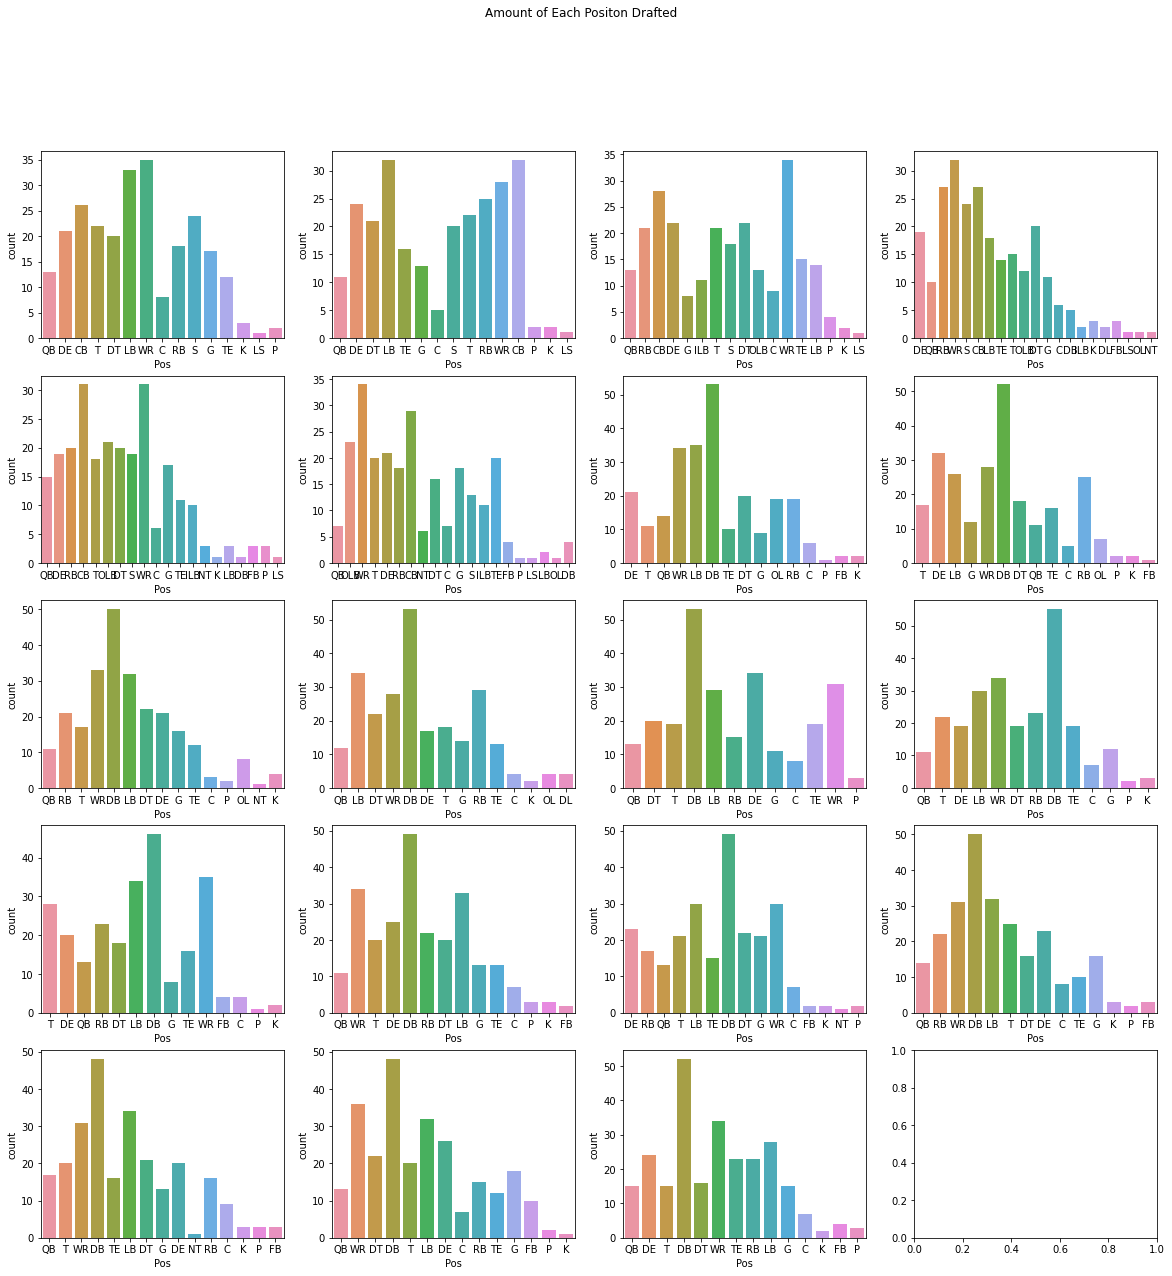

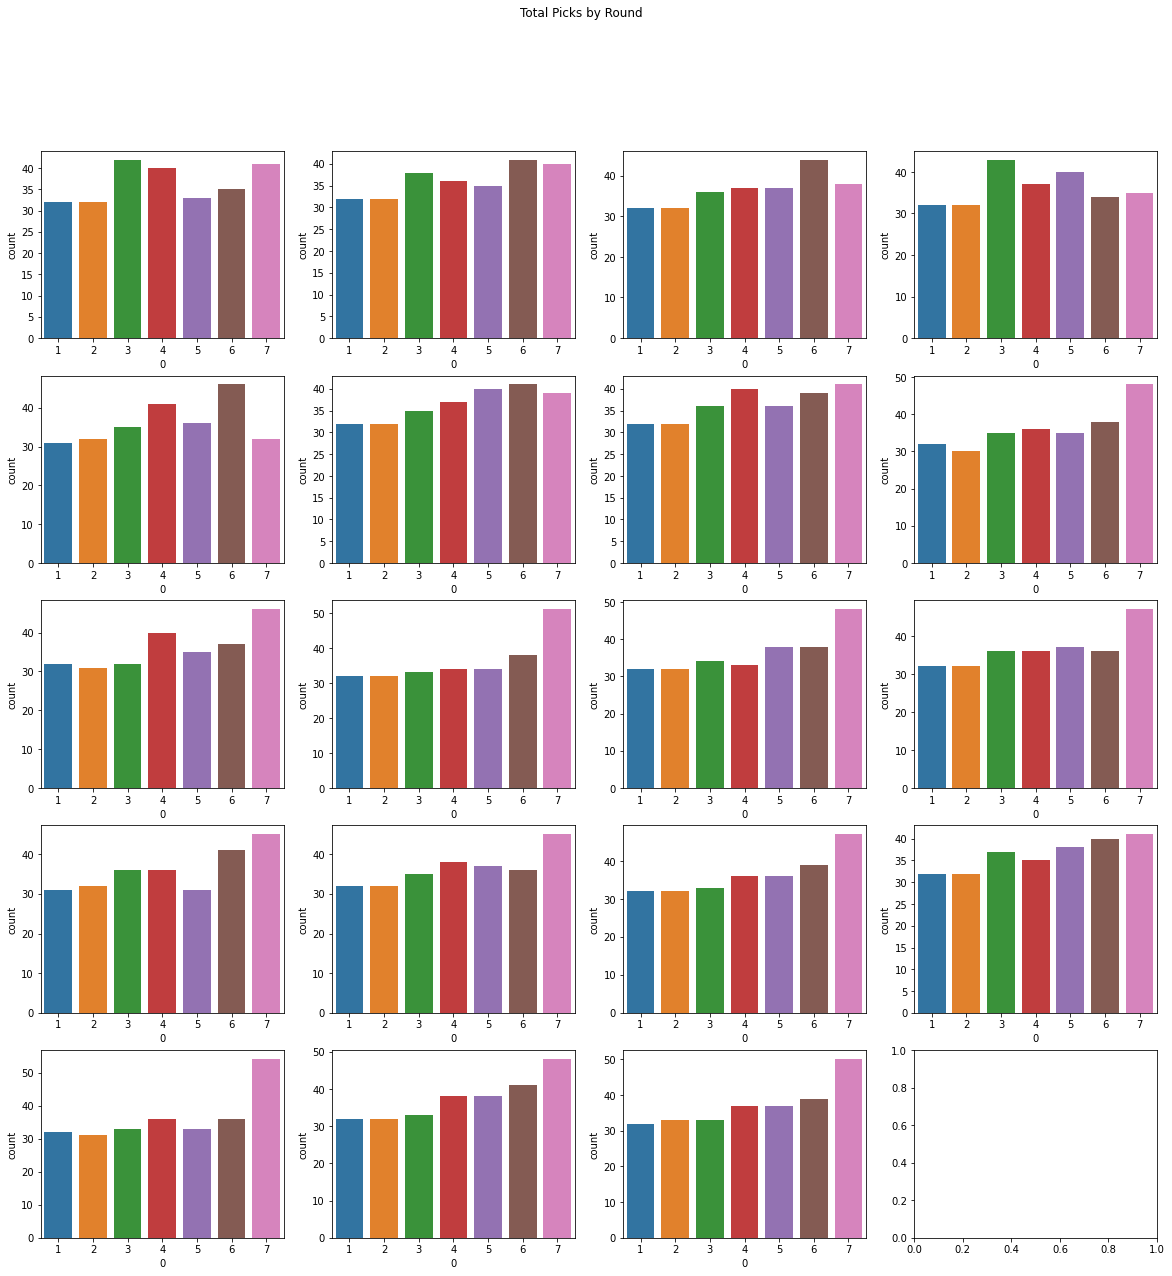

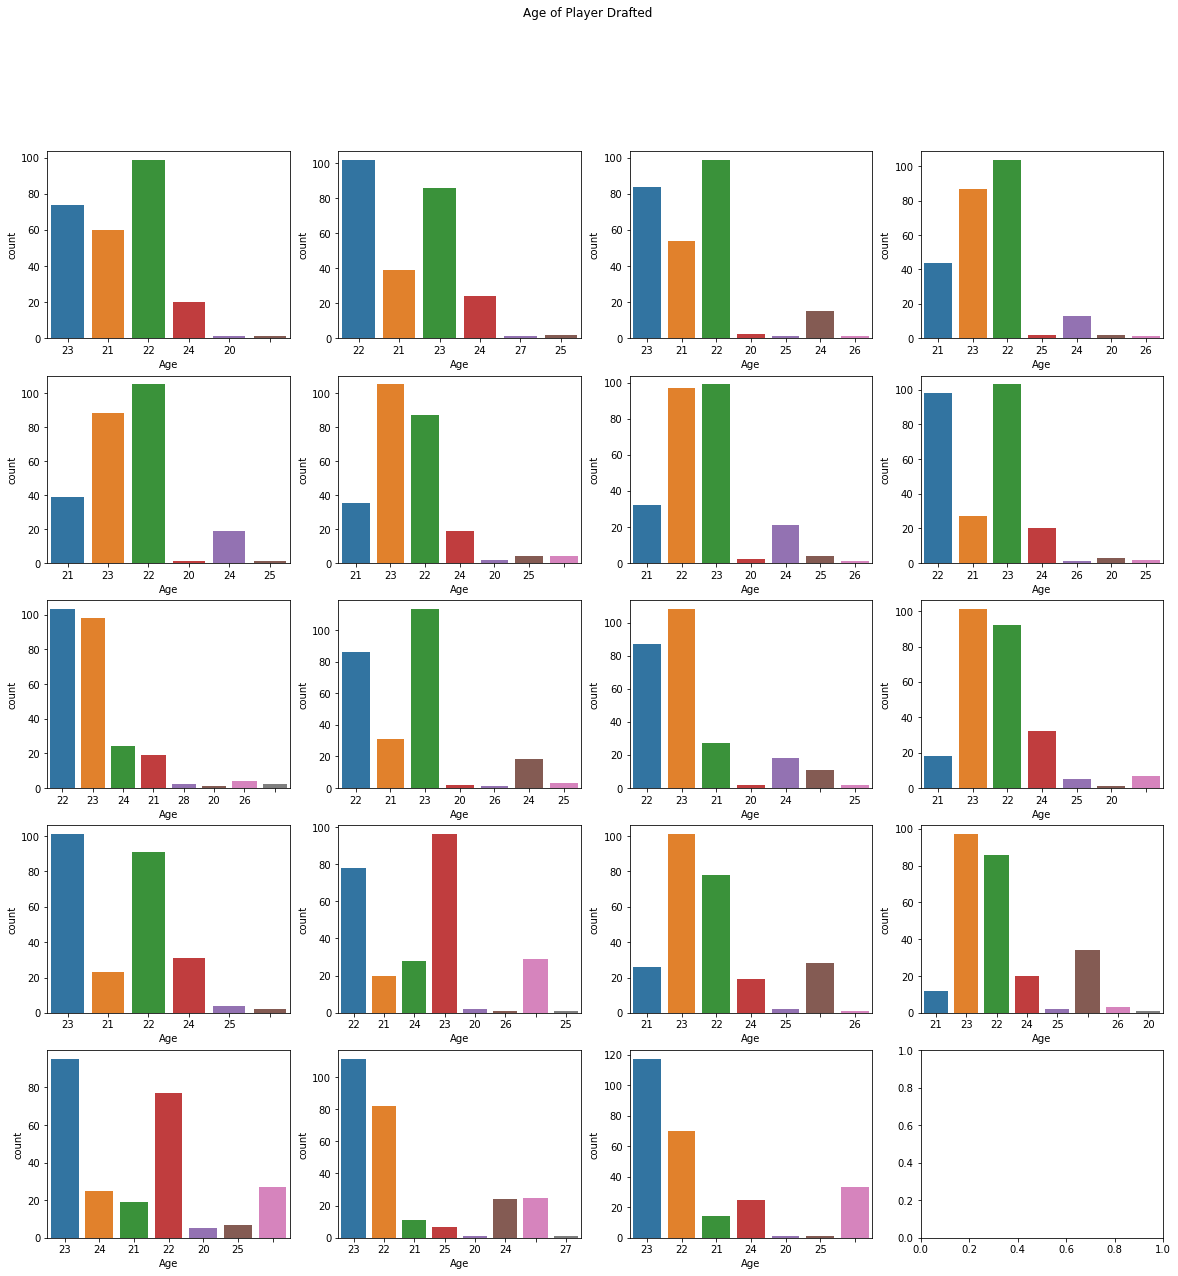

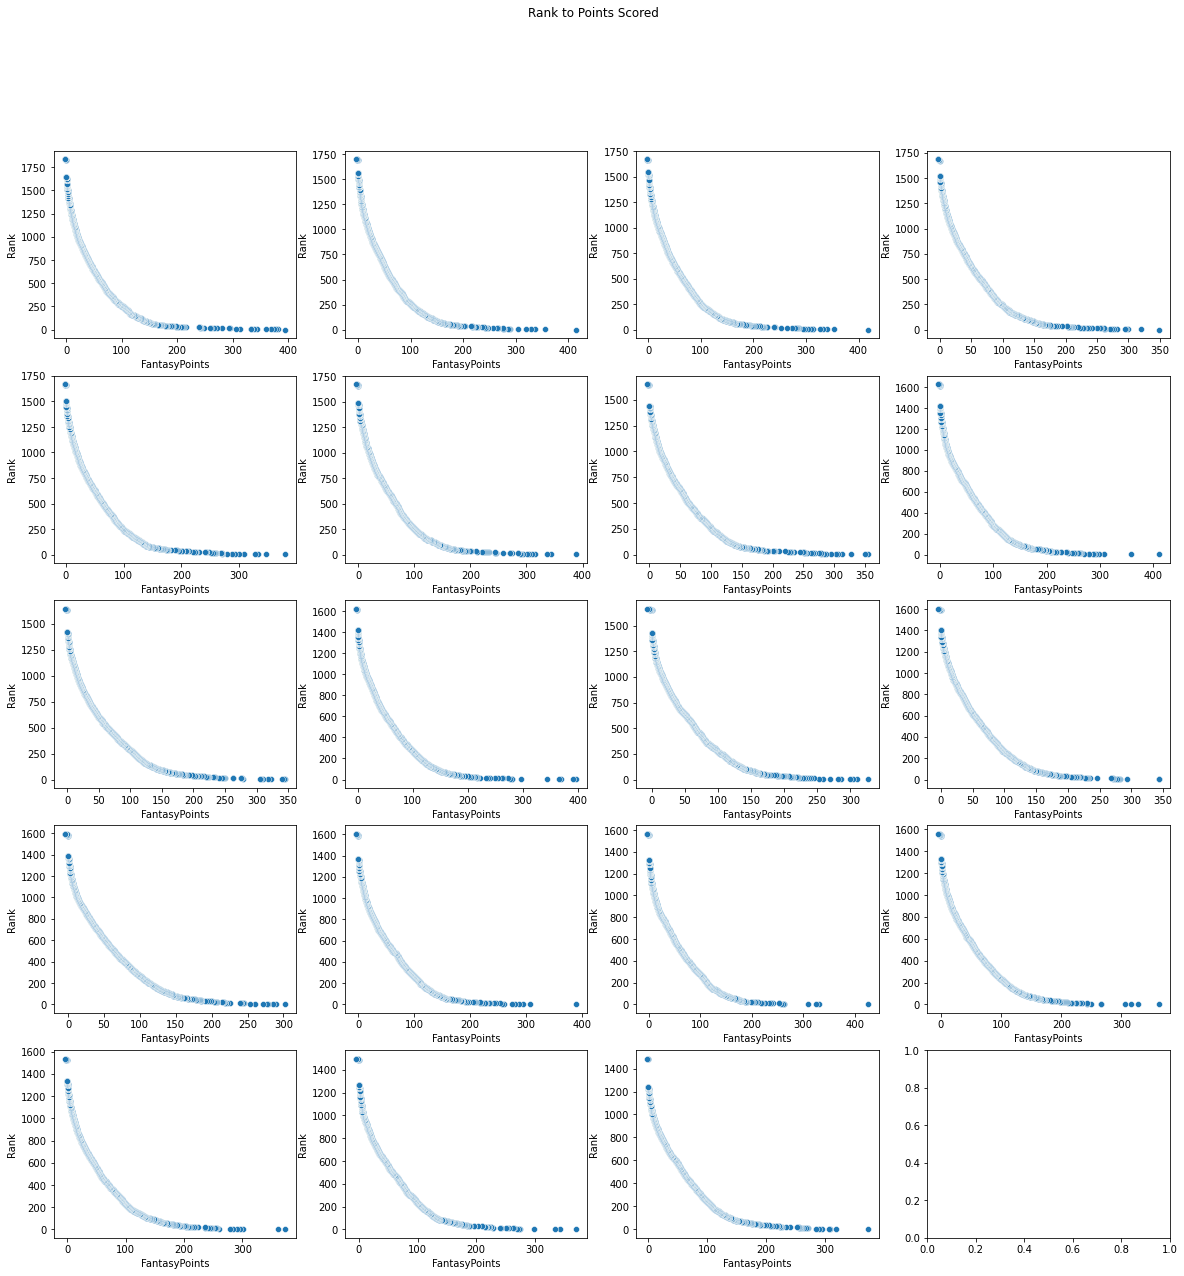

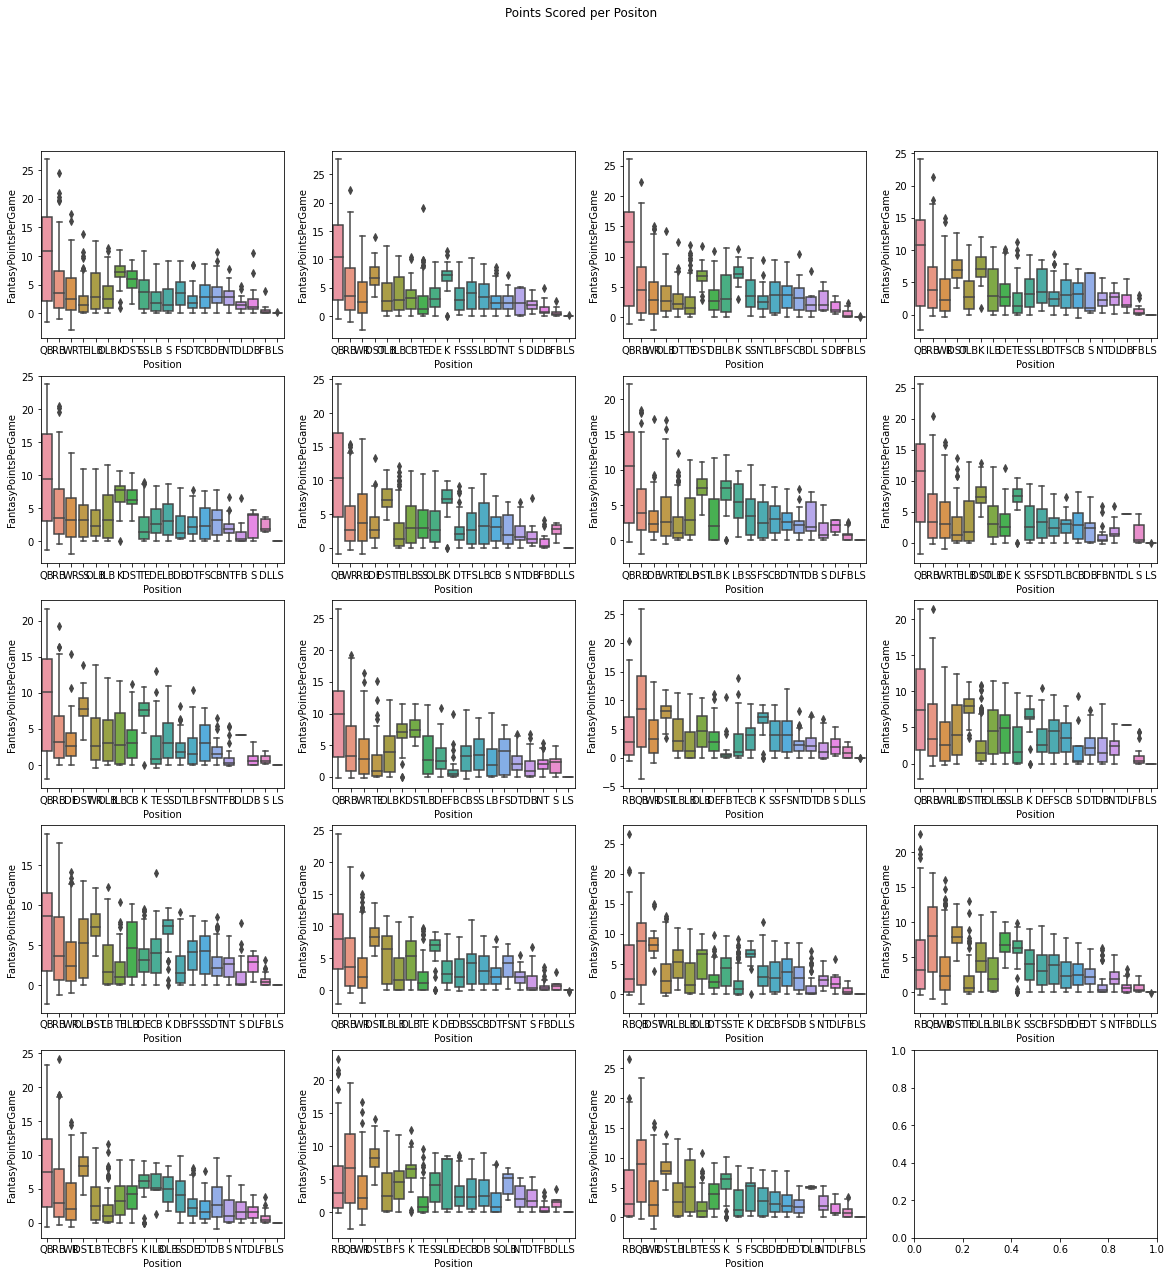

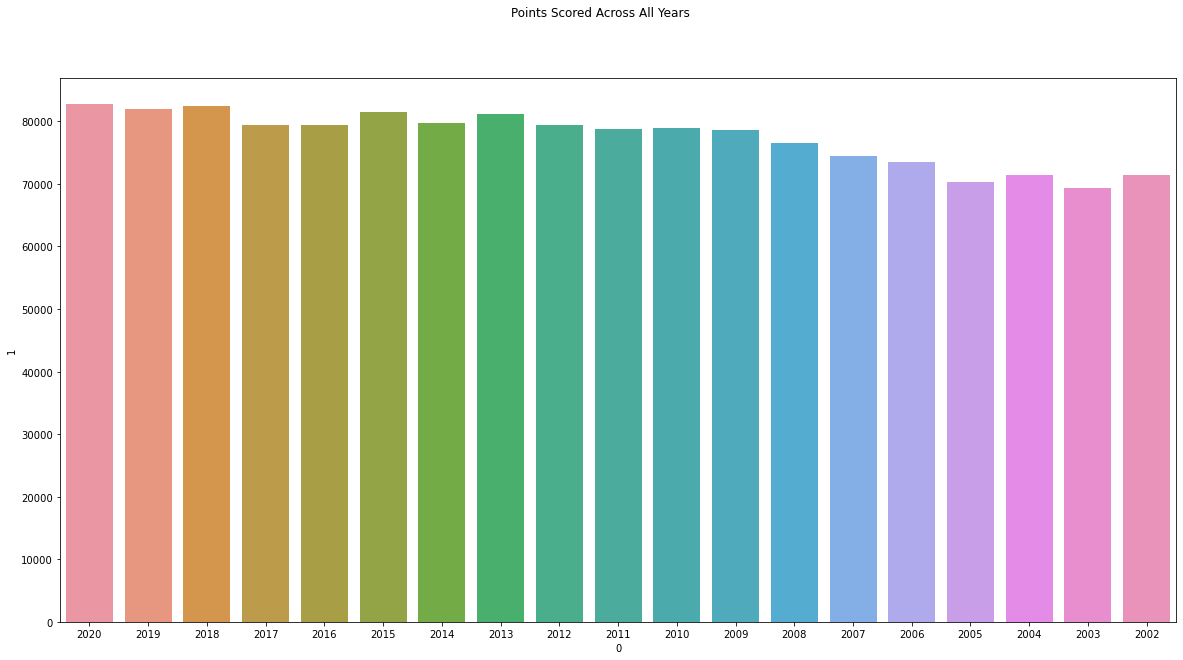

In [5]:
### POSTION COUNT OF DRAFTE 
fig, axs = plt.subplots(5,4, figsize=(20,20))
fig.suptitle('Amount of Each Positon Drafted')
sns.countplot(x = 'Pos', data = Frame20, ax = axs[0,0])
sns.countplot(x = 'Pos', data = Frame19, ax = axs[0,1])
sns.countplot(x = 'Pos', data = Frame18, ax = axs[0,2])
sns.countplot(x = 'Pos', data = Frame17, ax = axs[0,3])
sns.countplot(x = 'Pos', data = Frame16, ax = axs[1,0])
sns.countplot(x = 'Pos', data = Frame15, ax = axs[1,1])
sns.countplot(x = 'Pos', data = Frame14, ax = axs[1,2])
sns.countplot(x = 'Pos', data = Frame13, ax = axs[1,3])
sns.countplot(x = 'Pos', data = Frame12, ax = axs[2,0])
sns.countplot(x = 'Pos', data = Frame11, ax = axs[2,1])
sns.countplot(x = 'Pos', data = Frame10, ax = axs[2,2])
sns.countplot(x = 'Pos', data = Frame09, ax = axs[2,3])
sns.countplot(x = 'Pos', data = Frame08, ax = axs[3,0])
sns.countplot(x = 'Pos', data = Frame07, ax = axs[3,1])
sns.countplot(x = 'Pos', data = Frame06, ax = axs[3,2])
sns.countplot(x = 'Pos', data = Frame05, ax = axs[3,3])
sns.countplot(x = 'Pos', data = Frame04, ax = axs[4,0])
sns.countplot(x = 'Pos', data = Frame03, ax = axs[4,1])
sns.countplot(x = 'Pos', data = Frame02, ax = axs[4,2])


### DRAFT PICK PLOT
fig, axs = plt.subplots(5,4, figsize=(20,20))
fig.suptitle('Total Picks by Round')
print(sns.countplot(data = RDF20, x = 0, ax = axs[0,0]))
print(sns.countplot(data = RDF19, x = 0, ax = axs[0,1]))
print(sns.countplot(data = RDF18, x = 0, ax = axs[0,2]))
print(sns.countplot(data = RDF17, x = 0, ax = axs[0,3]))
print(sns.countplot(data = RDF16, x = 0, ax = axs[1,0]))
print(sns.countplot(data = RDF15, x = 0, ax = axs[1,1]))
print(sns.countplot(data = RDF14, x = 0, ax = axs[1,2]))
print(sns.countplot(data = RDF13, x = 0, ax = axs[1,3]))
print(sns.countplot(data = RDF12, x = 0, ax = axs[2,0]))
print(sns.countplot(data = RDF11, x = 0, ax = axs[2,1]))
print(sns.countplot(data = RDF10, x = 0, ax = axs[2,2]))
print(sns.countplot(data = RDF09, x = 0, ax = axs[2,3]))
print(sns.countplot(data = RDF08, x = 0, ax = axs[3,0]))
print(sns.countplot(data = RDF07, x = 0, ax = axs[3,1]))
print(sns.countplot(data = RDF06, x = 0, ax = axs[3,2]))
print(sns.countplot(data = RDF05, x = 0, ax = axs[3,3]))
print(sns.countplot(data = RDF04, x = 0, ax = axs[4,0]))
print(sns.countplot(data = RDF03, x = 0, ax = axs[4,1]))
print(sns.countplot(data = RDF02, x = 0, ax = axs[4,2]))

### AGE COUNT OF DRAFTEE
fig, axs = plt.subplots(5,4, figsize=(20,20))
fig.suptitle('Age of Player Drafted')
sns.countplot(data = Frame20, x ="Age", ax = axs[0,0])
sns.countplot(data = Frame19, x ="Age", ax = axs[0,1])
sns.countplot(data = Frame18, x ="Age", ax = axs[0,2])
sns.countplot(data = Frame17, x ="Age", ax = axs[0,3])
sns.countplot(data = Frame16, x ="Age", ax = axs[1,0])
sns.countplot(data = Frame15, x ="Age", ax = axs[1,1])
sns.countplot(data = Frame14, x ="Age", ax = axs[1,2])
sns.countplot(data = Frame13, x ="Age", ax = axs[1,3])
sns.countplot(data = Frame12, x ="Age", ax = axs[2,0])
sns.countplot(data = Frame11, x ="Age", ax = axs[2,1])
sns.countplot(data = Frame10, x ="Age", ax = axs[2,2])
sns.countplot(data = Frame09, x ="Age", ax = axs[2,3])
sns.countplot(data = Frame08, x ="Age", ax = axs[3,0])
sns.countplot(data = Frame07, x ="Age", ax = axs[3,1])
sns.countplot(data = Frame06, x ="Age", ax = axs[3,2])
sns.countplot(data = Frame05, x ="Age", ax = axs[3,3])
sns.countplot(data = Frame04, x ="Age", ax = axs[4,0])
sns.countplot(data = Frame03, x ="Age", ax = axs[4,1])
sns.countplot(data = Frame02, x ="Age", ax = axs[4,2])

### Scatter Plot Point Value Fig
fig, axs = plt.subplots(5,4, figsize=(20,20))
fig.suptitle('Rank to Points Scored')
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData20, ax = axs[0,0])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData19, ax = axs[0,1])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData18, ax = axs[0,2])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData17, ax = axs[0,3])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData16, ax = axs[1,0])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData15, ax = axs[1,1])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData14, ax = axs[1,2])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData13, ax = axs[1,3])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData12, ax = axs[2,0])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData11, ax = axs[2,1])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData10, ax = axs[2,2])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData09, ax = axs[2,3])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData08, ax = axs[3,0])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData07, ax = axs[3,1])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData06, ax = axs[3,2])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData05, ax = axs[3,3])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData04, ax = axs[4,0])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData03, ax = axs[4,1])
sns.scatterplot( x = 'FantasyPoints', y = 'Rank', data = FData02, ax = axs[4,2])

### BOX PLOT FOR POSITION POINTS IN A SEASON
fig, axs = plt.subplots(5,4, figsize=(20,20))
fig.suptitle('Points Scored per Positon')
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData20, ax = axs[0,0] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData19, ax = axs[0,1] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData18, ax = axs[0,2] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData17, ax = axs[0,3] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData16, ax = axs[1,0] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData15, ax = axs[1,1] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData14, ax = axs[1,2] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData13, ax = axs[1,3] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData12, ax = axs[2,0] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData11, ax = axs[2,1] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData10, ax = axs[2,2] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData09, ax = axs[2,3] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData08, ax = axs[3,0] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData07, ax = axs[3,1] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData06, ax = axs[3,2] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData05, ax = axs[3,3] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData04, ax = axs[4,0] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData03, ax = axs[4,1] )
sns.boxplot(x = 'Position', y = 'FantasyPointsPerGame', data = FData02, ax = axs[4,2] )

### GRAPH SEASON TOTAL
fig, ax = plt.subplots(figsize = (20,10))
fig.suptitle('Points Scored Across All Years')
print(sns.barplot(x = 0, y = 1, data = PointsFrame))

# Data Preparation:

When we look at our created data frames, we see that there is still much to be done before being able to run a model with it. Some of the actions that need to be taken are; removal of extra and missing variables, creating necessary variables, grouping different variables and merging the data so that everything is in one final data frame.

## Data Preparation - Variable Removal:

Because our hypothesis revolves around Draft position and nothing more, we do not want any data that may skew this. Therefore, we will remove individual ways a player got their points. In other words, it does not matter if they threw for 500 Yards or rushed for 200, all that matters is that the player got 20 points. We also do not care about the players college statistics, so we will remove those as well. After that, we will remove any blank rows as we identified earlier on. Finally, we will drop any players whose fantasy position is not in standard formats. Meaning, there is a unique format which counts individual players on defense as opposed to the team as a whole, because of this we will remove individual defensive players from the fantasy data as well as change all individual positions on defense in the draft data to DST. This applies to O-Line draft data as well as they do not have a corresponding fantasy value.

<br>

NOTE* - In this section we also added the round data to the draft data. This is needed to be done before removing any unimportant player

In [6]:
### Show an Example of Points Data
AllFF[0]

,Rank,Name,Team,Position,Played,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,Sacks,Interceptions,FumblesForced,FumblesRecovered,FantasyPointsPerGame,FantasyPoints
0,1,Josh Allen,BUF,QB,16,4544,37,10,421,8,1,12,1,0.0,0,0,0,24.7,395.06
1,2,Aaron Rodgers,GB,QB,16,4299,48,5,149,3,1,-6,0,0.0,0,0,0,23.9,382.26
2,3,Kyler Murray,ARI,QB,16,3971,26,12,819,11,0,0,0,0.0,0,0,0,23.7,378.74
3,4,Patrick Mahomes,KC,QB,15,4740,38,6,308,2,0,0,0,0.0,0,0,0,25.0,374.40
4,5,Deshaun Watson,HOU,QB,16,4823,33,7,444,3,0,0,0,0.0,0,0,0,23.1,369.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,1833,Nate Sudfeld,PHI,QB,1,32,0,1,12,0,0,0,0,0.0,0,0,0,-1.5,-1.52
1833,1834,Dede Westbrook,JAX,WR,2,0,0,0,0,0,1,4,0,0.0,0,0,0,-0.8,-1.60
1834,1835,Nsimba Webster,LAR,WR,16,0,0,0,0,0,0,0,0,0.0,0,0,0,-0.1,-2.00
1835,1835,Dwayne Harris,CHI,WR,3,0,0,0,0,0,0,0,0,0.0,0,0,0,-0.7,-2.00


In [7]:
### Show an Example of Draft Data
AllDD[0]

,Pick,Team,Player,Pos,Age,To,AP1,PB,St,CarAv,...,RYds,RTD,Rec,RYds,RTD,Solo,Int,Sk,College,Stats
0,1,CIN,Joe Burrow,QB,23,2021,0,0,2,7,...,260,5,0,0,0,1,,,LSU,College Stats
1,2,WAS,Chase Young,DE,21,2021,0,1,1,14,...,0,0,0,0,0,47,,9.0,Ohio St.,College Stats
2,3,DET,Jeff Okudah,CB,21,2021,0,0,0,2,...,0,0,0,0,0,44,1,,Ohio St.,College Stats
3,4,NYG,Andrew Thomas,T,21,2021,0,0,2,6,...,0,0,1,2,1,3,,,Georgia,College Stats
4,5,MIA,Tua Tagovailoa,QB,22,2021,0,0,2,5,...,237,6,0,0,0,,,,Alabama,College Stats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,251,SEA,Stephen Sullivan,TE,23,2021,0,0,0,0,...,0,0,0,0,0,,,,LSU,College Stats
257,252,DEN,Tyrie Cleveland,WR,22,2021,0,0,0,0,...,0,0,6,63,0,4,,,Florida,College Stats
258,253,MIN,Kyle Hinton,G,22,,0,0,0,,...,,,,,,,,,Washburn,
259,254,DEN,Derrek Tuszka,LB,24,2021,0,0,0,1,...,0,0,0,0,0,13,,2.0,North Dakota St.,


In [8]:
## DROP EXCESS COLUMNS 
for frame in AllFF:
    frame.drop(columns = ['Name','Rank','Played','PassingYards','PassingTouchdowns','PassingInterceptions','RushingYards','RushingTouchdowns','Receptions','ReceivingYards','ReceivingTouchdowns','Sacks','Interceptions','FumblesForced','FumblesRecovered','FantasyPointsPerGame'], inplace = True)
for frame in AllDD:
    frame.drop(columns =['Pick', 'To', 'AP1', 'PB', 'St',
       'CarAv', 'DrAV', 'G', 'Cmp', 'PAtt', 'PYds', 'PTD', 'Int', 'RAtt',
       'RYds', 'RTD', 'Rec', 'RYds', 'RTD', 'Solo', 'Int', 'Sk', 'College',
       'Stats','Age'],inplace = True)
    
### Define Vars
TeamNames = ['DEN', 'NO', 'KC', 'CAR', 'IND', 'CIN', 'LAC', 'DET', 'PHI', 'SEA',
       'SF', 'CHI', 'DAL', 'PIT', 'NE', 'ATL', 'MIA', 'CLE', 'ARI', 'WAS',
       'TB', 'BAL', 'GB', 'MIN', 'TEN', 'LAR', 'NYJ', 'HOU', 'JAX', 'BUF',
       'NYG', 'LV']
ALLPositions = ['QB', 'RB', 'WR', 'TE', 'DST', 'K']
NotPositions = ['ILB', 'OLB', 'SS', 'DE', 'DB', 'S', 'FS', 'LB', 'CB', 'DT', 'NT',
       'DL', 'FB', 'LS']

### Drop Rows with None
for value in range(19):
    AllDD[value].dropna(inplace = True)

x = 2020
### Add a year column 
for value in range(19):
    AllFF[value]['Year'] = str(x)
    x = x-1

### Add another year column    
x = 2020    
for value in range(19):
    AllDD[value]['Year'] = str(x)
    x = x-1

### Insert Round of Player picked
for value in range(19):
    AllDD[value].insert(1,'Rounds',ALLRND[value])
    
### Drop Uneeded FF Data
for value in range(19):
    AllFF[value].drop(AllFF[value].loc[AllFF[value]['Position'].isin(NotPositions)].index, inplace = True)

### Drop Un-needed Draft Players
NotNeededPos = ['T', 'C', 'G', 'LS', 'P','FB','OL'] 
for value in range(19):
    AllDD[value].drop(AllDD[value].loc[AllDD[value]['Pos'].isin(NotNeededPos)].index, inplace = True)
    

## Data Preparation - Variable Creation:

After removing any extra data, we need to then add useful data or change data to be useful. To start, we need to generalize all defense to DST as DST is the position used in fantasy scoring, not LB or SS. Then we will need to find total points scored for a team rather than a player. For example, we are interested in using QB points for DAL, but DAL used two QBS over the season, therefore, we need to add them together to make one DAL QB variable.

<br>

Another variable that needed to be created was the mean score for a position in each year and how much more that team scored in respect to the mean. This is helpful in that we can analyze it over years on the same playing field. For example, one team can score 200 points in one year and 200 the next, but if in one season 200 was the mean and the other the mean was 150, those 200 points scored are different. Finally, we also want to note the difference in mean between the previous year and current year. This can be helpful to predicting if a draftee will make the positional points significant. In practical terms, if a team is far from the mean and drafts a player, it may not be as important as a team that is close to the mean and drafts that same player.

<br>

A point of note is that this cannot be done for the first year (2002) as there is no previous year data to compare it to.

In [9]:
### CHANGE POSITIONS IN DRAFT TO DEF
SwapPos = [ 'DE', 'CB', 'DT', 'LB',  'S','DB','NT','DL','OLB','ILB']
for value in range(19):
    AllDD[value].replace(SwapPos, 'DST',inplace = True)

### Find the sum of positon of the team for a given year
TeamList = ['DAL', 'LV', 'KC', 'BUF', 'CAR', 'GB', 'ARI', 'HOU', 'SEA', 'LAC',
       'BAL', 'TEN', 'TB', 'MIN', 'NO', 'PIT', 'JAX', 'ATL', 'CIN', 'NE',
       'MIA', 'PHI', 'DET', 'LAR', 'CLE', 'CHI', 'IND', 'DEN', 'NYG',
       'WAS', 'SF', 'NYJ']
PosList = ['QB', 'RB', 'WR', 'TE', 'K', 'DST']
YearList = ['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013',
       '2012', '2011','2010', '2009', '2008', '2007', '2006','2005','2004','2003']
for value in range(19):
    for y in TeamList:
        for z in PosList:
            AllFF[value].loc[(AllFF[value]['Team'] == y) & (AllFF[value]['Position'] == z),'FantasyPoints'] = AllFF[value][(AllFF[value]['Team'] == y) & (AllFF[value]['Position'] == z)]['FantasyPoints'].sum()

### Drop Duplicates
for value in range(19):
    AllFF[value].drop_duplicates(inplace = True)

### Drop NA
for value in range(19):
    AllFF[value].dropna(inplace = True)
    
### Create Mean of Position per year
for value in range(19):
    AllFF[value]['Mean_Score'] = float()
    AllFF[value]['Yr_to_Yr'] = float()
for value in range(19):
    for y in PosList:
        AllFF[value].loc[AllFF[value]['Position'] == y, 'Mean_Score'] = AllFF[value][AllFF[value]['Position'] == y].FantasyPoints.mean()
        
###  Create this year points scores above or below mean
for value in range(19):        
    AllFF[value]['This_Yr_Pts_Mean'] =  AllFF[value]['FantasyPoints'] - AllFF[value]['Mean_Score']
    
### Calculate Change in Average Points Above/Below Mean - From Year to Year
for value in range(18):
    for y in TeamList:
        for z in PosList:
            AllFF[value].loc[(AllFF[value]['Position'] == z) & (AllFF[value]['Team'] == y), 'Yr_to_Yr'] = AllFF[value][(AllFF[value]['Team']  == y) & (AllFF[value]['Position'] == z)]['This_Yr_Pts_Mean'] - float(AllFF[value+1][(AllFF[value+1]['Team']  == y) & (AllFF[value+1]['Position'] == z)]['This_Yr_Pts_Mean'])

### Remove last fantasy points as it is not complete
AllFF = AllFF[0:len(AllFF)-1]

## Data Preparation - Data Reshaping and Feature Engineering - Pt1

Now that the data consists only needed data, we want to combine all the years into data frames only containing Draft data and Fantasy data. Before merging these together, we need to make sure the variables we are combining on are the same. When looking at Year, Team and Position, which is what we will combine on, we see Team is spelled differently in some rows, so that needs to be fixed.

<br>

Once everything is merged properly, we still need to prep the data a little more for analysis. The data is in the form of 'Position' and the values are QB, WR, DST etc. We need these to be binary so we will create dummy variables for this. Then we will use this information of was a position drafted to multiply it by the round, so we can get when that player was drafted as that is an important piece of information. That new information corresponds to what position was drafted and when, but once again we need that to be binary of 'Was a QB drafted by team 'A' in round 1.' This can be done by using the dummy function one last time. 

<br>

Along this process we will be removing duplicates that may occur.

In [10]:
### Combine all DataFrames
FinalFF = pd.concat(AllFF)
FinalDD = pd.concat(AllDD)
FinalFF.rename(columns = {'Position':'Pos'}, inplace = True)

### Change the Wrong Names
GoodInit = ['LV','SF','GB', 'KC', 'NE', 'TB',
       'NO', 'LV','LAC','LAR']
BadInit = ['LVR','SFO', 'GNB', 'KAN', 'NWE', 'TAM', 'NOR', 'OAK', 'SDG', 'STL']
FinalDD.replace(BadInit, GoodInit, inplace = True)

### Merge all the data and drop excess
test = pd.merge(FinalDD, FinalFF, on =['Team','Year','Pos'], how = 'right')
test.dropna(inplace = True)

### Reset Index value
test.index = range(len(test))
### Get Dummies
PosDum = pd.get_dummies(test.Pos)

### Multiply by round to get round of each pick
for row in range(len(test)):
    for value in range(6):
        (PosDum.loc[row][value]) = (PosDum.loc[row][value]) * int(test.Rounds[row])
        
### Convrt it to a Str
for value in PosList:
    PosDum[value] = PosDum[value].astype(str)
    
### Get Dummy again and drop 0s (not picked)
PosDumRND = pd.get_dummies(PosDum)
PosDumRND.drop(['DST_0','WR_0','RB_0','QB_0','TE_0','K_0'],axis = 1, inplace = True)

### Create our Final Data Frame
OURDATA = pd.concat([test,PosDumRND], axis = 1)
OURDATA.drop(['Rounds','Player'], axis = 1, inplace = True)

### Find all Positions drafted in a year
PosSpecList = ['DST_1', 'DST_2', 'DST_3', 'DST_4', 'DST_5', 'DST_6',
       'DST_7', 'K_2','K_3', 'K_4', 'K_5', 'K_6', 'K_7', 'QB_1', 'QB_2', 'QB_3',
       'QB_4', 'QB_5', 'QB_6', 'QB_7', 'RB_1', 'RB_2', 'RB_3', 'RB_4', 'RB_5',
       'RB_6', 'RB_7', 'TE_1', 'TE_2', 'TE_3', 'TE_4', 'TE_5', 'TE_6', 'TE_7',
       'WR_1', 'WR_2', 'WR_3', 'WR_4', 'WR_5', 'WR_6', 'WR_7']


## Data Preperation - Data Reshaping and Feature Engineering - Pt2

There are a few more variable creations and data manipulations that need to occur before we can run our models. Right now we have data that corresponds to a Team, Year, Postion drafted, and when that position was drafted, but we need to consider all that was drafted, not just when that one person was drafted. In real world terms, if ARI drafts 2 WRs in a draft, that can be different than if it only drafted one WR. To accomplish this, we need to add up the dummy variables only if the year, and team match up, then remove any duplicates.

<br>

You will see this needs to be separate for kickers as some years no kickers were drafted. After this step is done, we will find the points scored above or below the mean from the previous season. As we stated earlier this is important as significance can be based on how well a team did the previous year + the players drafted that year.

<br>

Last, but most importantly we will create our response variable. This is done by taking the teams points scored in a given year and seeing if it is above the 90th percentile of points scored that year. If it is, then the position for that team was an impactful situation, if not, it is not impactful.

<br>

Last thing to note, since a majority are not impactful, to aid with the models, our response variable tells us if it is **NOT IMPACTFUL**, yet we are focusing on if they are impactful.


In [11]:
### Sum up to find all drafted
for x in TeamList:
    for y in YearList:
        for z in PosSpecList:    
            OURDATA.loc[(OURDATA['Team']== x) & (OURDATA['Year'] == y),z] = OURDATA[(OURDATA['Team']== x) & (OURDATA['Year'] == y)][z].sum()

### Remove duplicates    
OURDATA.drop_duplicates(inplace = True)

### Create responce Var - NO KICKER
OURDATA['Top_Tier'] = ''
for x in YearList:
    for y in ['QB', 'RB', 'WR', 'TE', 'DST']:
        OURDATA.loc[(OURDATA['Pos'] == y) & (OURDATA['Year'] == x), 'Top_Tier'] = np.percentile(OURDATA[(OURDATA['Pos']== y) & (OURDATA['Year'] == x)]['FantasyPoints'],90)

### CREATE RESPONCE Var FOR KICKER
YearList2 = ['2020', '2019', '2018', '2017', '2016', '2014', '2013',
       '2012', '2011', '2009', '2008', '2007', '2006','2005','2004','2003']

for x in YearList2:
    for y in ['K']:
        OURDATA.loc[(OURDATA['Pos'] == y) & (OURDATA['Year'] == x), 'Top_Tier'] = np.percentile(OURDATA[(OURDATA['Pos']== y) & (OURDATA['Year'] == x)]['FantasyPoints'],90)

### Reset Index value
OURDATA.index = range(len(OURDATA))
OURDATA['Not_Impactful'] = float()

### Find Responce Var
for x in range(len(OURDATA)):
 
    if OURDATA.loc[x][48] > OURDATA.loc[x][3]:
        OURDATA['Not_Impactful'][x] = 1
    else:
        OURDATA['Not_Impactful'][x] = 0
        
### Find Mean points of position of previous year
OURDATA['Last_Yr_Pts_Mean'] = float()
for x in range(len(OURDATA)):
    OURDATA['Last_Yr_Pts_Mean'][x] = OURDATA['This_Yr_Pts_Mean'][x] - OURDATA['Yr_to_Yr'][x]
    

<ipython-input-11-4e47a31efe48>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OURDATA['Not_Impactful'][x] = 0
<ipython-input-11-4e47a31efe48>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OURDATA['Not_Impactful'][x] = 1
<ipython-input-11-4e47a31efe48>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OURDATA['Last_Yr_Pts_Mean'][x] = OURDATA['This_Yr_Pts_Mean'][x] - OURDATA['Yr_to_Yr'][x]


In [12]:
### Show Final Data 
OURDATA

,Team,Pos,Year,FantasyPoints,Mean_Score,Yr_to_Yr,This_Yr_Pts_Mean,DST_1,DST_2,DST_3,...,WR_1,WR_2,WR_3,WR_4,WR_5,WR_6,WR_7,Top_Tier,Not_Impactful,Last_Yr_Pts_Mean
0,BUF,QB,2020,404.34,294.6400,83.41250,109.7000,0,1,0,...,0,0,0,1,0,1,0,377.668,0.0,26.28750
1,GB,QB,2020,381.96,294.6400,77.27250,87.3200,0,0,0,...,0,0,0,0,0,0,0,377.668,0.0,10.04750
2,TEN,QB,2020,344.64,294.6400,9.03250,50.0000,0,1,0,...,0,0,0,0,0,0,0,377.668,1.0,40.96750
3,LAC,QB,2020,341.82,294.6400,73.89250,47.1800,1,0,0,...,0,0,0,0,1,0,1,377.668,1.0,-26.71250
4,TEN,RB,2020,380.90,295.6625,51.76375,85.2375,0,1,0,...,0,0,0,0,0,0,0,371.55,0.0,33.47375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,DAL,TE,2003,79.00,78.8000,37.73625,0.2000,1,0,0,...,0,0,0,0,0,1,0,118.27,1.0,-37.53625
1787,PHI,TE,2003,73.40,78.8000,-0.46375,-5.4000,1,0,0,...,0,0,1,0,0,0,0,118.27,1.0,-4.93625
1788,LAR,TE,2003,35.90,78.8000,-32.26375,-42.9000,1,1,0,...,0,0,1,1,0,0,0,118.27,1.0,-10.63625
1789,JAX,TE,2003,33.10,78.8000,-62.56375,-45.7000,0,1,0,...,0,0,0,0,0,0,0,118.27,1.0,16.86375


# Prepped Data Review

The last step before our analysis is to double check the new data and make sure everyhting checks out, as well as seeing if there are any noticable trends.

<br>

When looking for null values we see there are none.

In [13]:
### See any missign data
OURDATA.isnull().sum()

Team                0
Pos                 0
Year                0
FantasyPoints       0
Mean_Score          0
Yr_to_Yr            0
This_Yr_Pts_Mean    0
DST_1               0
DST_2               0
DST_3               0
DST_4               0
DST_5               0
DST_6               0
DST_7               0
K_2                 0
K_3                 0
K_4                 0
K_5                 0
K_6                 0
K_7                 0
QB_1                0
QB_2                0
QB_3                0
QB_4                0
QB_5                0
QB_6                0
QB_7                0
RB_1                0
RB_2                0
RB_3                0
RB_4                0
RB_5                0
RB_6                0
RB_7                0
TE_1                0
TE_2                0
TE_3                0
TE_4                0
TE_5                0
TE_6                0
TE_7                0
WR_1                0
WR_2                0
WR_3                0
WR_4                0
WR_5      

## Prepped Data Review - Graphs

Below we see a few graphs regarding our response variable, fantasy points scored per position, and draft data. Our response variable is ovewhelmingly Not Impactful which is in line with our 90 percentile cut off. Fantasy points scored has much less outliers than originally thought than when looking at each individual year. This tells us that it is common for a player to score a large amount of points and that it happens yearly. Lastly, when looking at the draft graphs the distribution of who picked, who was picked and how many picks looks normal, so it seems all data is good to use for our models.

AxesSubplot(0.125,0.125;0.352273x0.343182)
AxesSubplot(0.547727,0.125;0.352273x0.343182)


<AxesSubplot:xlabel='Team', ylabel='count'>

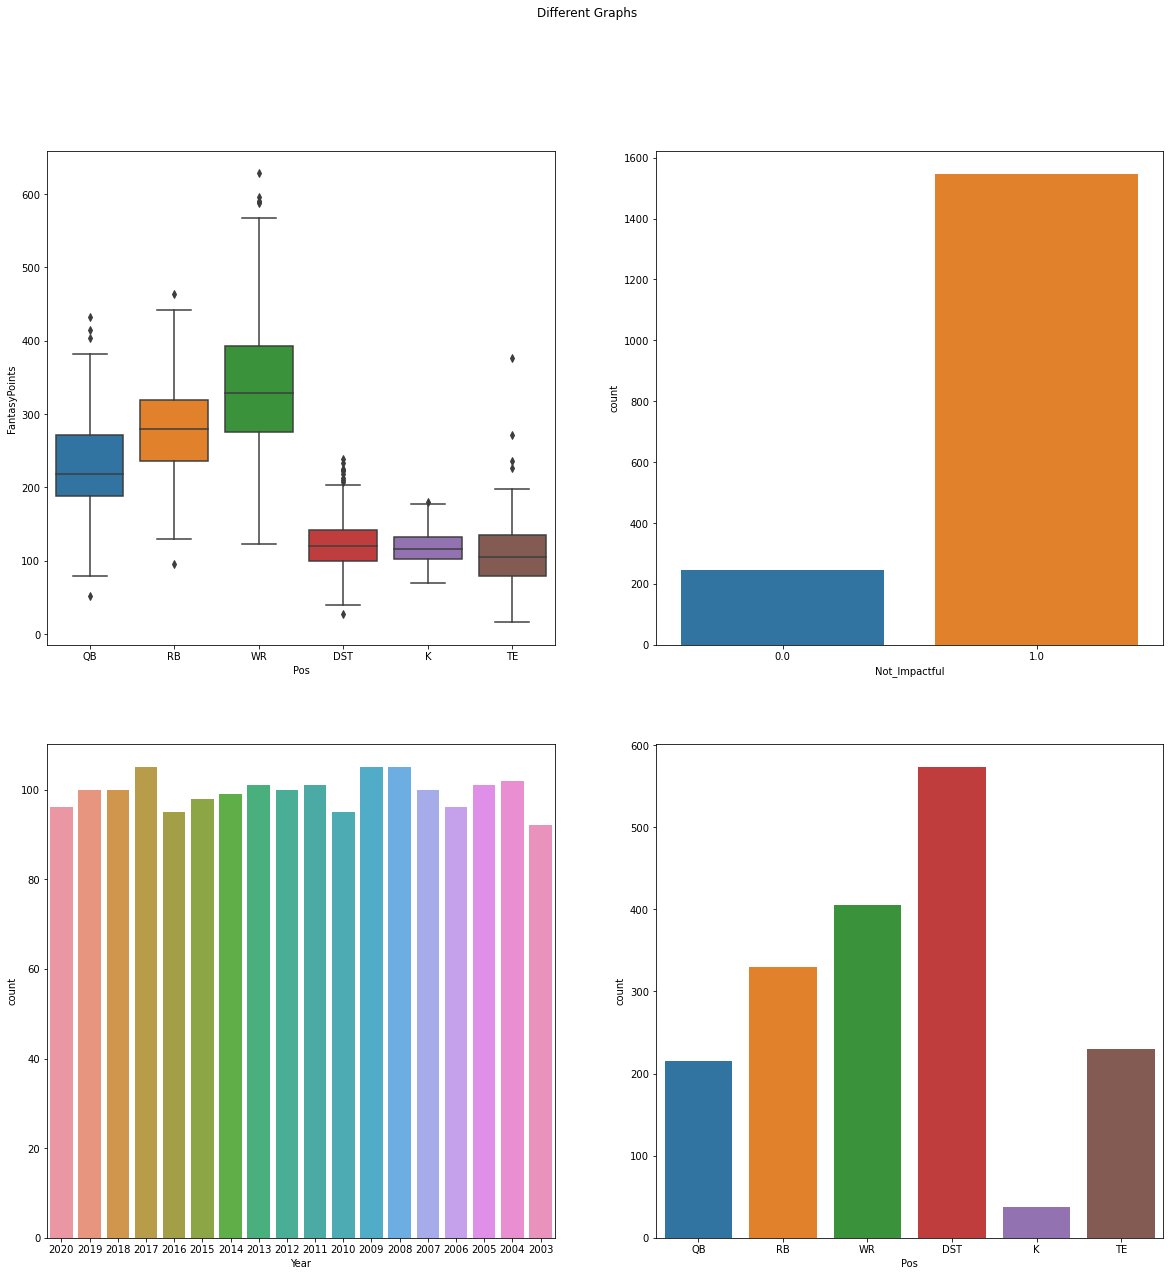

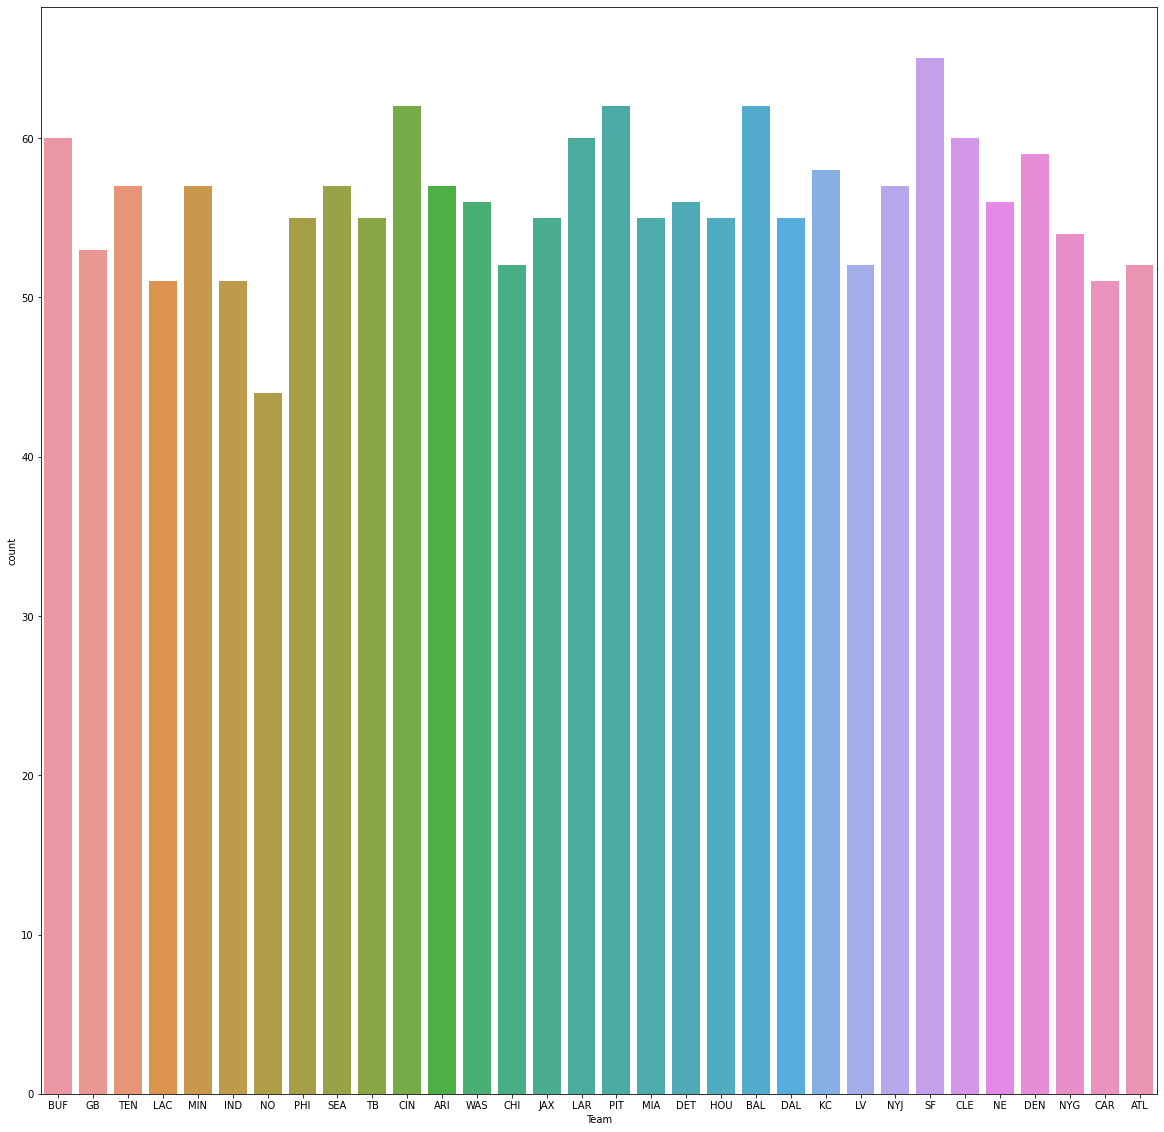

In [14]:
### Graphs from OURDATA
fig, axs = plt.subplots(2,2, figsize=(20,20))
fig.suptitle('Different Graphs')
sns.boxplot(y = 'FantasyPoints', x = 'Pos', data = OURDATA, ax = axs[0,0])
sns.countplot(x = "Not_Impactful", data = OURDATA, ax = axs[0,1])
print(sns.countplot(x = 'Year', data = OURDATA, ax = axs[1,0]))
print(sns.countplot(x = 'Pos', data = OURDATA, ax = axs[1,1]))

fig, axs = plt.subplots( figsize=(20,20))
sns.countplot(x = 'Team',  data = OURDATA)

# Investigative Analysis and Results:

Throughout this analysis our goal will be to improve accuracy of choosing a Impactful player than randomly guessing. We will be using different models and attempting to improve on each model if the result is not as desirable.

## Investigative Analysis - Import Packages
Below we loaded all packages we need for the analysis

In [15]:
# import statsmodels
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV

## Logistic Regression - Basic:

The first of the three models we plan to run is a Logistic Regression. This is a regression model that if the predicted variable has greater than 50% chance to be 1 it is one and if not it is 0.

<br>

We first will make a new data frame with just the variables we plan to use for the Model. 

<br>

The percentage of accuracy we are trying to beat is **86.3%.** In order to avoid overfitting and only modeling for our data, we will use a train and test set as well as a cross validation technique. After that we will produce a confusion matrix for our train and test set. A confusion matrix will give us more insight into the specifics of how well the model performed.

<br>

The results for this model are as follows:
- TrainTest: 84.37%
- CV: 85.87%
- CM Precision - 1 :86%
- CM Precision - 0 : 29%
- CM Recall - 1 : 98%
- CM Recall - 0 : 4%
- CM F1 Score - 1 : 91%
- CM F1 Score - 0 : 8%

Precision is equal to percent predicted for value, over all that were that predicted for said value.
<br>
Recall is equal to percent predicted for a value, over all that were actually that value.
<br>
**For this hypothesis we are trying to maximize how much Impactful players we are able to identify and thus not only get those players, but not let our opponents get them.** This is important to realize as we progress because even if the model as a whole produces worse results, ie overall accuracy, it is more important to understand the tradeoff. The tradeoff is letting good players slip away and also not taking bad players, vs taking more bad players but also more good players.

<br>

While it would be good to have this data on a cross validated situation, it is not available, so as long as the CV is close to the predicted overall accuracy for our train and test set, we will go with that confusion matrix.

In [16]:
### Remove descriptive variables
ModelFrame = OURDATA[['DST_1', 'DST_2', 'DST_3', 'DST_4', 'DST_5',
       'DST_6', 'DST_7', 'K_2', 'K_4', 'K_5', 'K_6', 'K_7', 'QB_1', 'QB_2',
       'QB_3', 'QB_4', 'QB_5', 'QB_6', 'QB_7', 'RB_1', 'RB_2', 'RB_3', 'RB_4',
       'RB_5', 'RB_6', 'RB_7', 'TE_1', 'TE_2', 'TE_3', 'TE_4', 'TE_5', 'TE_6',
       'TE_7', 'WR_1', 'WR_2', 'WR_3', 'WR_4', 'WR_5', 'WR_6', 'WR_7',
        'Last_Yr_Pts_Mean','Not_Impactful']]
    
### x and y set as values
OURDATA['Not_Impactful']= (OURDATA['Not_Impactful'] == 1).astype(int)
y = OURDATA['Not_Impactful']
Using = [ 'DST_1', 'DST_2', 'DST_3', 'DST_4', 'DST_5',
       'DST_6', 'DST_7', 'K_2', 'K_4', 'K_5', 'K_6', 'K_7', 'QB_1', 'QB_2',
       'QB_3', 'QB_4', 'QB_5', 'QB_6', 'QB_7', 'RB_1', 'RB_2', 'RB_3', 'RB_4',
       'RB_5', 'RB_6', 'RB_7', 'TE_1', 'TE_2', 'TE_3', 'TE_4', 'TE_5', 'TE_6',
       'TE_7', 'WR_1', 'WR_2', 'WR_3', 'WR_4', 'WR_5', 'WR_6', 'WR_7',
        'Last_Yr_Pts_Mean',]
x = ModelFrame[Using]


Choosing all to be Not Impactful results in a 0.8632049134561698 Percent accuracy
Percent of Not_Impactful in Ytrain: 86.86
Percent of Not_Impactful in Ytest: 85.33
Accuracy using train and test 84.37
The acuracy of prediction using LogReg CV is 0.8587430167597766

               precision    recall  f1-score   support

           0       0.29      0.04      0.08        92
           1       0.86      0.98      0.91       535

    accuracy                           0.84       627
   macro avg       0.57      0.51      0.50       627
weighted avg       0.77      0.84      0.79       627


 [[  4  88]
 [ 10 525]]


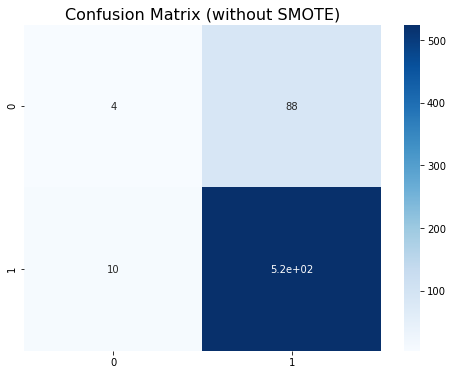

In [17]:
### If we choose all to fail 
print('Choosing all to be Not Impactful results in a',OURDATA.Not_Impactful.mean(),'Percent accuracy')

# set train and test
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.35, random_state = 23)
print('Percent of Not_Impactful in Ytrain:',np.round(ytrain.value_counts(normalize = True)[1]*100,2))
print('Percent of Not_Impactful in Ytest:', np.round(ytest.value_counts(normalize = True)[1]*100,2))

### Type of Model
Model = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit Model
result = Model.fit(xtrain, ytrain)

# Predict values
predicted = Model.predict(xtest)

# Show accuracy 
print('Accuracy using train and test', np.round(metrics.accuracy_score(ytest, predicted)*100,2))

### Create CV
scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), x, y, scoring='accuracy', cv=10)
print('The acuracy of prediction using LogReg CV is', scores.mean())

### ConfMat
cm = confusion_matrix(ytest, predicted)
print('\n',classification_report(ytest,predicted))
print('\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

## Decision Tree - Basic:

For this model we will be using the exact same logic regarding accuracy and confusion matrices, but we will be using a different techniques of modeling. We will use a decision tree. This model works in a way that if a decided variable is greater than or less than a cutoff it will travel either left or right down the node. It will continue this until it decides that that path is either a 1 or a 0.

<br>

The results for different statistic are as follows:

- TrainTest: 84.5%
- CV: 84.65%
- CM Precision - 1 :86%
- CM Precision - 0 : 37%
- CM Recall - 1 : 98%
- CM Recall - 0 : 8%
- CM F1 Score - 1 : 92%
- CM F1 Score - 0 : 13%

While the recall and F1 Score for Impactful are not great, it is better than the previous model.

Accuracy with Train_Test: 0.8452950558213717
Accuracy with CV: 0.8465359477124182

               precision    recall  f1-score   support

           0       0.37      0.08      0.13        92
           1       0.86      0.98      0.92       535

    accuracy                           0.85       627
   macro avg       0.61      0.53      0.52       627
weighted avg       0.79      0.85      0.80       627


 [[  7  85]
 [ 12 523]]


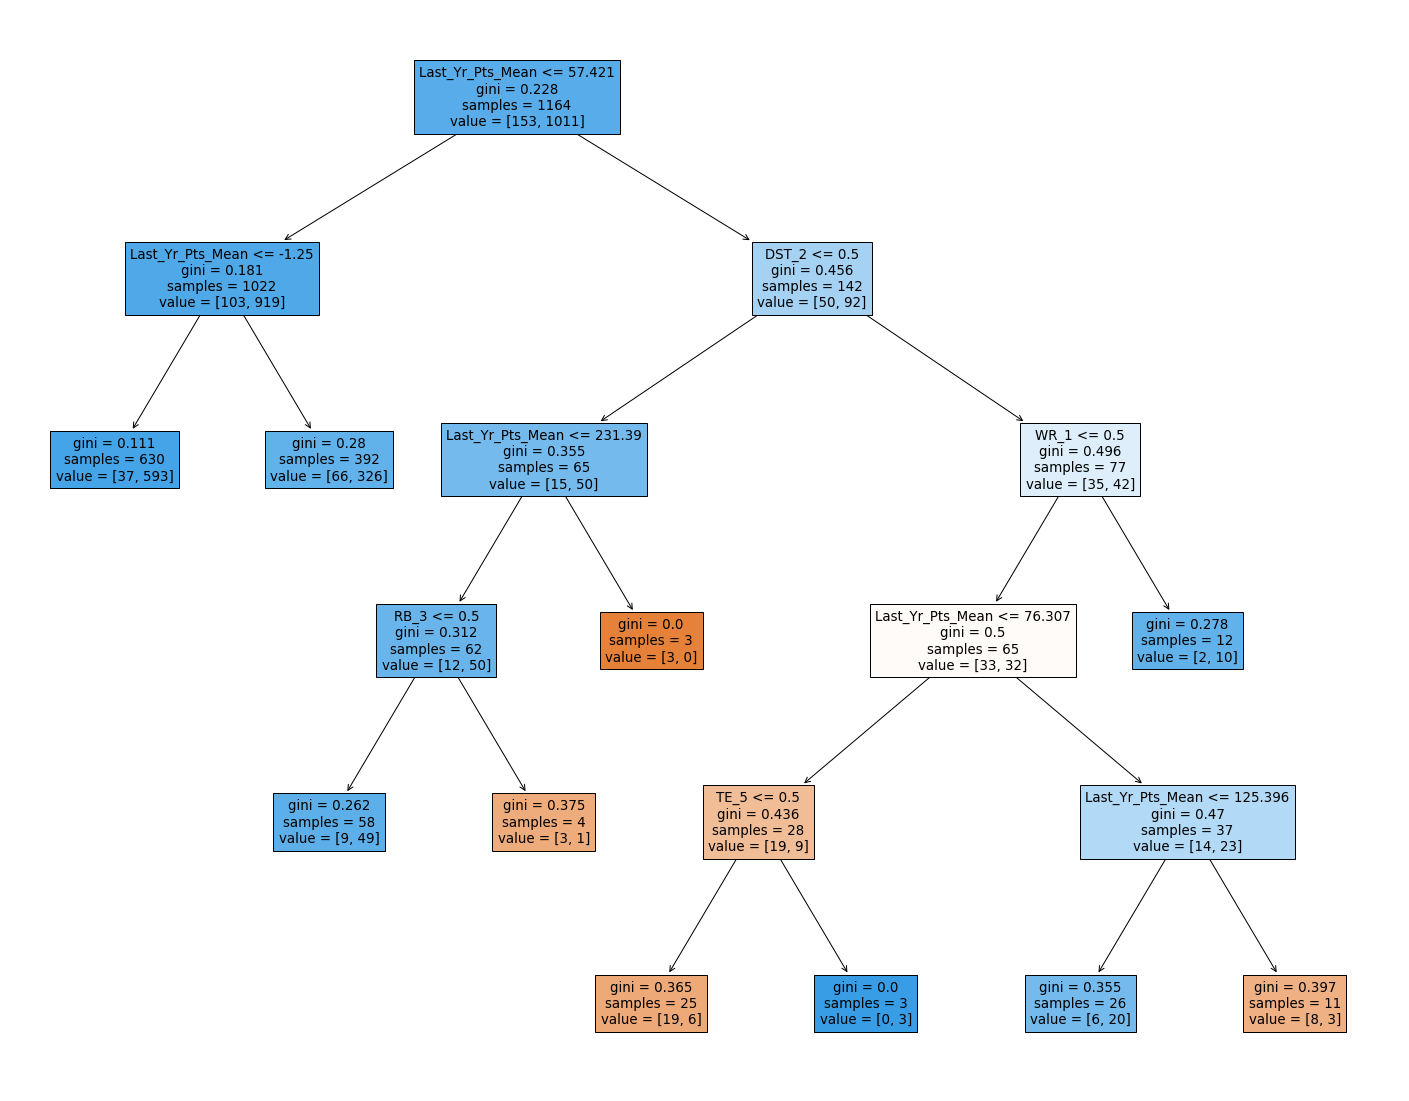

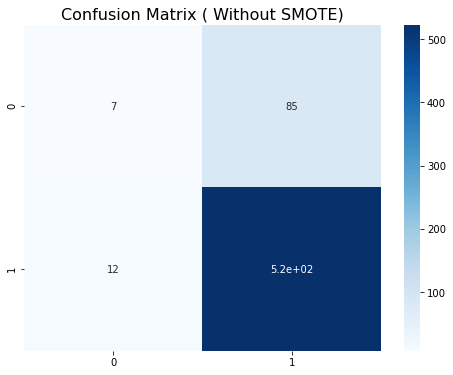

In [18]:
# # set train and test
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.35, random_state = 23)

### Create Model
Model = DecisionTreeClassifier(random_state = 15, max_leaf_nodes = 10)

# fit Model
result = Model.fit(xtrain, ytrain)

# Predict values
predicted = Model.predict(xtest)

# Show accuracy 
print('Accuracy with Train_Test:', metrics.accuracy_score(ytest, predicted))
fig = plt.figure(figsize=(25,20))
tree.plot_tree(result, feature_names = Using,filled=True)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=4, random_state=15)
scores = cross_val_score(Model, x, y, scoring='accuracy', cv= 100)
print('Accuracy with CV:',scores.mean())

### Confusion MAtrix
cm = confusion_matrix(ytest, predicted)
print('\n',classification_report(ytest,predicted))
print('\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix ( Without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

## KNN Model - Basic:

This is the third of our 3 model styles. KNN will use near variables, depending on the user input to predict if another variable is 1 or 0. Like the models before we will use CV and Train Test to find accuracy with a focus on the Impactful variable. We do want to make sure we are using the correct amount of neighbors, so to do that we will plot the accuracy of different neighbors and choose the best option. Our model will show that 12 neighbors is best.

<br>

The results for this model are as follows:
- TrainTest: 84.5%
- CV: 85.2%
- CM Precision - 1 :90%
- CM Precision - 0 : 26%
- CM Recall - 1 : 76%
- CM Recall - 0 : 49%
- CM F1 Score - 1 : 82%
- CM F1 Score - 0 :34%

This model performs even better than the previous ones with a F1 score of 34% and recall of 49% for the Impactful variable.

Accuracy without CV: 0.8452950558213717
Accuracy with CV:  0.8525915580384854

               precision    recall  f1-score   support

           0       0.37      0.08      0.13        92
           1       0.86      0.98      0.92       535

    accuracy                           0.85       627
   macro avg       0.61      0.53      0.52       627
weighted avg       0.79      0.85      0.80       627


 [[  9  83]
 [ 14 521]]


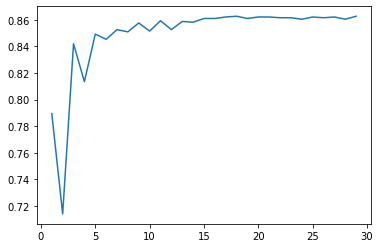

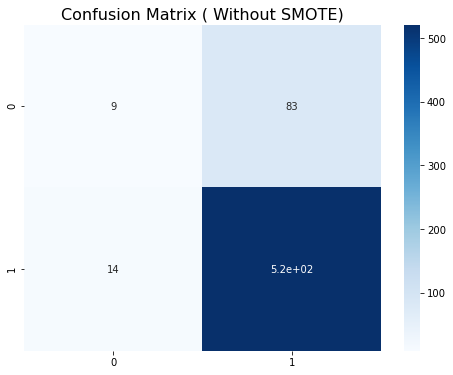

In [19]:
### Train Test 
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.35, random_state = 23)

## USE KNN MODEL
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(xtrain, ytrain)
y_pred = knn.predict(xtest)
print('Accuracy without CV:',metrics.accuracy_score(ytest, y_pred))

## With CV

crossKnn = cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy')
print('Accuracy with CV: ',crossKnn.mean())

## Plot to find optimal neighbors
kRange = range(1,30)
kscore = []

for value in kRange:
    knn = KNeighborsClassifier(n_neighbors = value)
    crossKnn = cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy')
    kscore.append(crossKnn.mean())

plt.plot(kRange, kscore)

cm = confusion_matrix(ytest, y_pred)
print('\n',classification_report(ytest,predicted))
print('\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix ( Without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

## Logistic Regression - With SMOTE:

To attempt to improve upon our models we will lean to the idea of SMOTE. This is the thought that since our response variable is very imbalanced, we want to balance the data, using similar neighbors to the lacking response variable to create our model. Then we will use that to predict our unchanged train data. We will still use the same ideas from above in regard to all three of our models, we will just over sample for the model itself.

<br>

Here are the Results for our new model:

- TrainTest: 60.2% - WORSE 
- CV: 68% - WORSE
- CM Precision - 1 :86% - Similar
- CM Precision - 0 : 16% - WORSE
- CM Recall - 1 : 64% - WORSE
- CM Recall - 0 : 40% - BETTER
- CM F1 Score - 1 : 73% - WORSE
- CM F1 Score - 0 : 23% - BETTER

While this model might have mixed feelings regarding its accuracy, if we think about it from a fantasy players perspective this is better. The logic is as follows. We may be predicting bad players as good, but once we see them play bad, they can be removed. No one, gets rid of good players, so by getting more good and more bad players, we can eventually remove the bad and keep the good, while if we got less of the good, we never would be able to get the good as they are on other fantasy players teams.

<br>

In short, it is better to play riskier if we are getting more good players in our pool as part of the process, even if it means to an overall worse accuracy.

Accuracy without CV: 0.7575757575757576
The acuracy using CV is 0.6801471969934231

               precision    recall  f1-score   support

           0       0.23      0.28      0.25        92
           1       0.87      0.84      0.86       535

    accuracy                           0.76       627
   macro avg       0.55      0.56      0.56       627
weighted avg       0.78      0.76      0.77       627


 [[ 26  66]
 [ 86 449]]


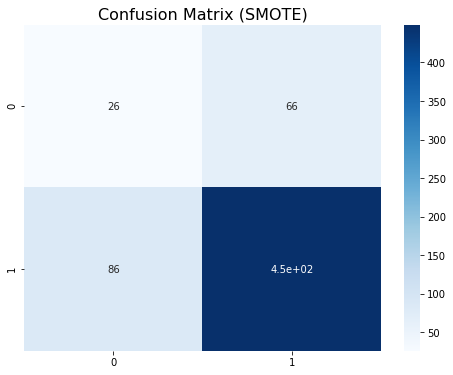

In [20]:
### SMOTE

X = ModelFrame.loc[:, ModelFrame.columns != 'Not_Impactful'  ]
Y = OURDATA.loc[:,OURDATA.columns == 'Not_Impactful']

Xval = X.values
Yval = Y.values
os = SMOTE(random_state=0)

### Train test the SMOTE DATA
X_train, X_test, Y_train, Y_test = train_test_split(Xval, Yval, test_size=0.35, random_state=23)

# RE-Sample to get more Y values
X2, Y2 = os.fit_resample(Xval, Yval)
os_data_X,os_data_Y = os.fit_resample(X_train, Y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=Using)
os_data_Y= pd.DataFrame(data=os_data_Y,columns=['Not_Impactful'])

## Fit the Model to sampled
result = Model.fit(os_data_X.values, os_data_Y.values.ravel())

## Predict Not sampled
predicted = Model.predict(X_test)

## Show accuracy 
print('Accuracy without CV:', metrics.accuracy_score(Y_test, predicted))

## Create CV
scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), X2, Y2.ravel(), scoring='accuracy', cv=10)
print('The acuracy using CV is', scores.mean())

## ConfMat
cm = confusion_matrix(Y_test, predicted)
print('\n',classification_report(ytest,predicted))
print('\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

## Decision Tree - SMOTE

Continuing the idea of SMOTE for this model we get:

- TrainTest: 62.3% - WORSE
- CV: 68% - WORSE
- CM Precision - 1 :61% - WORSE
- CM Precision - 0 : 24% - WORSE
- CM Recall - 1 : 61% - WORSE
- CM Recall - 0 : 72% - BETTER
- CM F1 Score - 1 : 73% - WORSE
- CM F1 Score - 0 : 36% - BETTER

**So far this is the best model in regards to Impactful recall and F1 Score.**

Accuracy with Train_Test: 0.6236044657097288
Accuracy with CV: 0.6814844973379267

               precision    recall  f1-score   support

           0       0.24      0.72      0.36        92
           1       0.93      0.61      0.73       535

    accuracy                           0.62       627
   macro avg       0.58      0.66      0.55       627
weighted avg       0.83      0.62      0.68       627


 [[ 66  26]
 [210 325]]


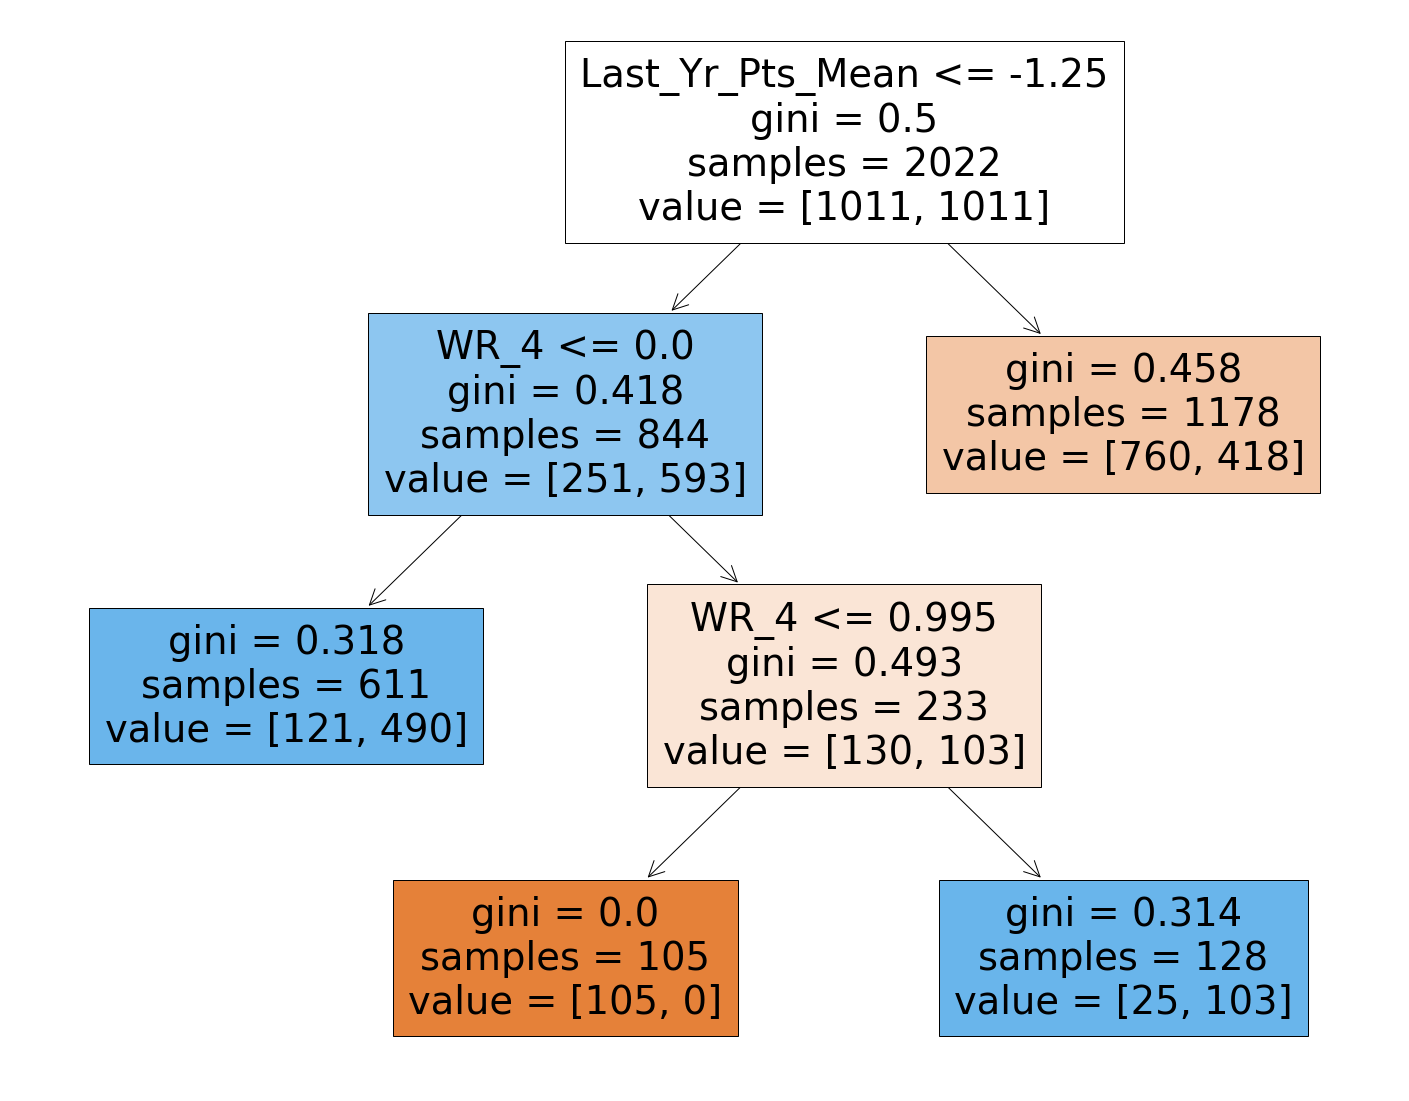

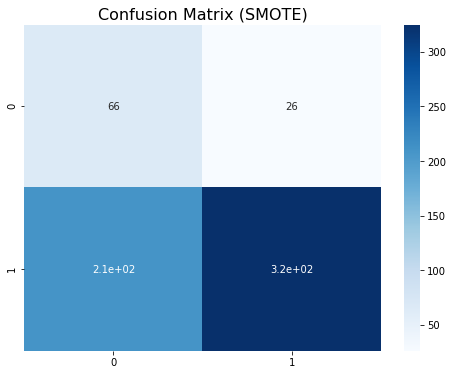

In [21]:
## set train and test
X_train, X_test, Y_train, Y_test = train_test_split(Xval, Yval, test_size=0.35, random_state=23)

### Create Model
Model = DecisionTreeClassifier(random_state = 15, max_leaf_nodes = 4)

# fit Model
X2, Y2 = os.fit_resample(Xval, Yval)
os_data_X,os_data_Y = os.fit_resample(X_train, Y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=Using)
os_data_Y= pd.DataFrame(data=os_data_Y,columns=['Not_Impactful'])

### Decide the Model
result = Model.fit(os_data_X.values, os_data_Y.values.ravel())

# Predict values
predicted = Model.predict(X_test)

# Show accuracy 
print('Accuracy with Train_Test:', metrics.accuracy_score(Y_test, predicted))
fig = plt.figure(figsize=(25,20))
tree.plot_tree(result, feature_names = Using,filled=True)

# Cross Validate
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=4, random_state=15)
scores = cross_val_score(Model, X2, Y2, scoring='accuracy', cv= 10)
print('Accuracy with CV:',scores.mean())

### Confusion MAtrix
cm = confusion_matrix(Y_test, predicted)
print('\n',classification_report(Y_test,predicted))
print('\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

## KNN Model - SMOTE:

The results for this model with SMOTE are as follows:
- TrainTest: 60% - WORSE
- CV: 68% - WORSE
- CM Precision - 1 :86% - WORSE
- CM Precision - 0 : 16% - WORSE
- CM Recall - 1 : 64% - WORSE
- CM Recall - 0 : 40% - WORSE
- CM F1 Score - 1 : 73% - WORSE
- CM F1 Score - 0 :23% - WORSE

Every aspect of this model was worse than the basic thus the Decision Tree Model is still better.

Accuracy without CV: 0.6028708133971292
Accuracy with CV:  0.6882440755820023

               precision    recall  f1-score   support

           0       0.16      0.40      0.23        92
           1       0.86      0.64      0.73       535

    accuracy                           0.60       627
   macro avg       0.51      0.52      0.48       627
weighted avg       0.76      0.60      0.66       627


 [[ 37  55]
 [194 341]]


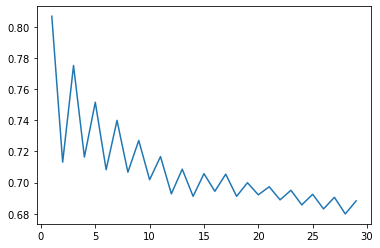

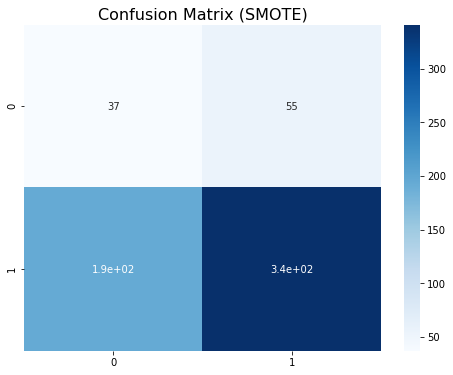

In [22]:
# # set train and test
X_train, X_test, Y_train, Y_test = train_test_split(Xval, Yval, test_size=0.35, random_state=23)

# Find SMOTE
X2, Y2 = os.fit_resample(Xval, Yval)
os_data_X,os_data_Y = os.fit_resample(X_train, Y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=Using)
os_data_Y= pd.DataFrame(data=os_data_Y,columns=['Not_Impactful'])

## USE KNN MODEL
Model = KNeighborsClassifier(n_neighbors = 1)
Model.fit(os_data_X.values, os_data_Y.values.ravel())
y_pred = Model.predict(X_test)
print('Accuracy without CV:',metrics.accuracy_score(Y_test, y_pred))

## With CV

crossKnn = cross_val_score(knn, X2, Y2.ravel(), cv = 10, scoring = 'accuracy')
print('Accuracy with CV: ',crossKnn.mean())

## Plot to find optimal neighbors
kRange = range(1,30)
kscore = []

for value in kRange:
    knn = KNeighborsClassifier(n_neighbors = value)
    crossKnn = cross_val_score(knn, X2, Y2.ravel(), cv = 10, scoring = 'accuracy')
    kscore.append(crossKnn.mean())

plt.plot(kRange, kscore)

cm = confusion_matrix(Y_test, y_pred)
print('\n',classification_report(ytest,y_pred))
print('\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

## Logistic Regression - Scaled and SMOTE:

The last upgrade we will try to do is scaling the data. The idea behind this is that if the max of a column is 2, a 2 means more than if the max of a column was 200. But without scaling the model can not always identify that. Our variables do not have such a high difference in values but one important one does, so we will attempt to scale and SMOTE to see if there is any improvement.


Here are the Results for our new model:

- TrainTest: 64.2% - Similar 
- CV: 67% - Similar
- CM Precision - 1 :93% - BETTER
- CM Precision - 0 : 25% - BETTER
- CM Recall - 1 : 63% - SIMILAR
- CM Recall - 0 : 72% - BETTER
- CM F1 Score - 1 : 75% - SIMILAR
- CM F1 Score - 0 : 37% - BETTER

This model performs better in every aspect than other Logistic regression models and even slightly better than the SMOTE tree model, making it the best one yet.

Percent of Not_Impactful in Ytrain: 50.0
Percent of Not_Impactful in Ytest: 85.33

Accuracy using train and test 64.27
The acuracy of prediction using SMOTE SCALED REG CV is 0.6778849566760623


C:\Users\ydsolomo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



               precision    recall  f1-score   support

           0       0.25      0.72      0.37        92
           1       0.93      0.63      0.75       535

    accuracy                           0.64       627
   macro avg       0.59      0.67      0.56       627
weighted avg       0.83      0.64      0.69       627


 [[ 66  26]
 [198 337]]


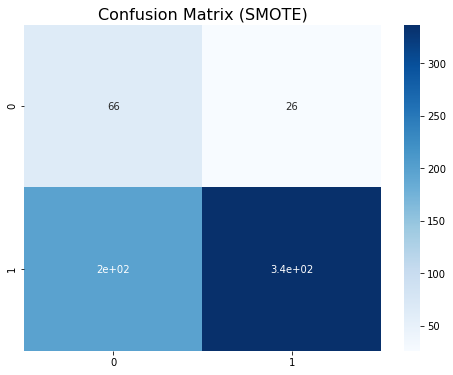

In [23]:
### set train and test
xtrain,xtest,ytrain,ytest = train_test_split(Xval,Yval, test_size = 0.35, random_state = 23)

### SMOTE THE DATA
X2, Y2 = os.fit_resample(Xval, Yval)
X2 = pd.DataFrame(data=X2,columns=Using)
Y2 = pd.DataFrame(data=Y2,columns=['Not_Impactful'])

osX,osY = os.fit_resample(xtrain, Y_train)
osX = pd.DataFrame(data=osX,columns=Using)
osY= pd.DataFrame(data=osY,columns=['Not_Impactful'])
ytestDF = pd.DataFrame(data = ytest, columns = ['Not_Impactful'])

### Scale the Data
### find columns to scale (Above 1)
to_scale = [col for col in osX.columns if osX[col].max() > .99]
to_scale2 = [col for col in X2.columns if X2[col].max() > .99]

## Set Scale
scaler = MinMaxScaler()

### Scale the Data
scaled = scaler.fit_transform(osX[to_scale])
scaled2 = scaler.fit_transform(X2[to_scale2])

### See the difference in Y values
print('Percent of Not_Impactful in Ytrain:',np.round(osY.value_counts(normalize = True)[1]*100,2))
print('Percent of Not_Impactful in Ytest:', np.round(ytestDF.value_counts(normalize = True)[1]*100,2))

### Type of Model
Model = LogisticRegression(solver='lbfgs', max_iter=1000)

### fit Model
result = Model.fit(scaled, osY)

### Predict values
predicted = Model.predict(xtest)

### Show accuracy 
print('\nAccuracy using train and test', np.round(metrics.accuracy_score(ytest, predicted)*100,2))

### Create CV 
Y2 = pd.DataFrame(Y2, columns = ['Not_Impactful'])
scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), scaled2, Y2.values.ravel(), scoring='accuracy', cv=10)
print('The acuracy of prediction using SMOTE SCALED REG CV is', scores.mean())

### ConfMat
cm = confusion_matrix(ytest, predicted)
print('\n',classification_report(ytest,predicted))
print('\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

## Decision Tree - Scaled and SMOTE:

Using both scaled data and SMOTE for this model we see:
- TrainTest: 71.3% - BETTER
- CV: 72% - Similar
- CM Precision - 1 :90% - BETTER
- CM Precision - 0 : 26% - Similar
- CM Recall - 1 : 76% - BETTER
- CM Recall - 0 : 49% - WORSE
- CM F1 Score - 1 : 82% - BETTER
- CM F1 Score - 0 : 34% - Similar

While this model performs better and worse in different area than other tree models, the logistic regression from before is still the best one.

Percent of Not_Impactful in Ytrain: 50.0
Percent of Not_Impactful in Ytest: 85.33
Accuracy with Train_Test: 0.7192982456140351
Accuracy with CV: 0.7235452552458503

               precision    recall  f1-score   support

           0       0.26      0.49      0.34        92
           1       0.90      0.76      0.82       535

    accuracy                           0.72       627
   macro avg       0.58      0.62      0.58       627
weighted avg       0.80      0.72      0.75       627


 [[ 45  47]
 [129 406]]


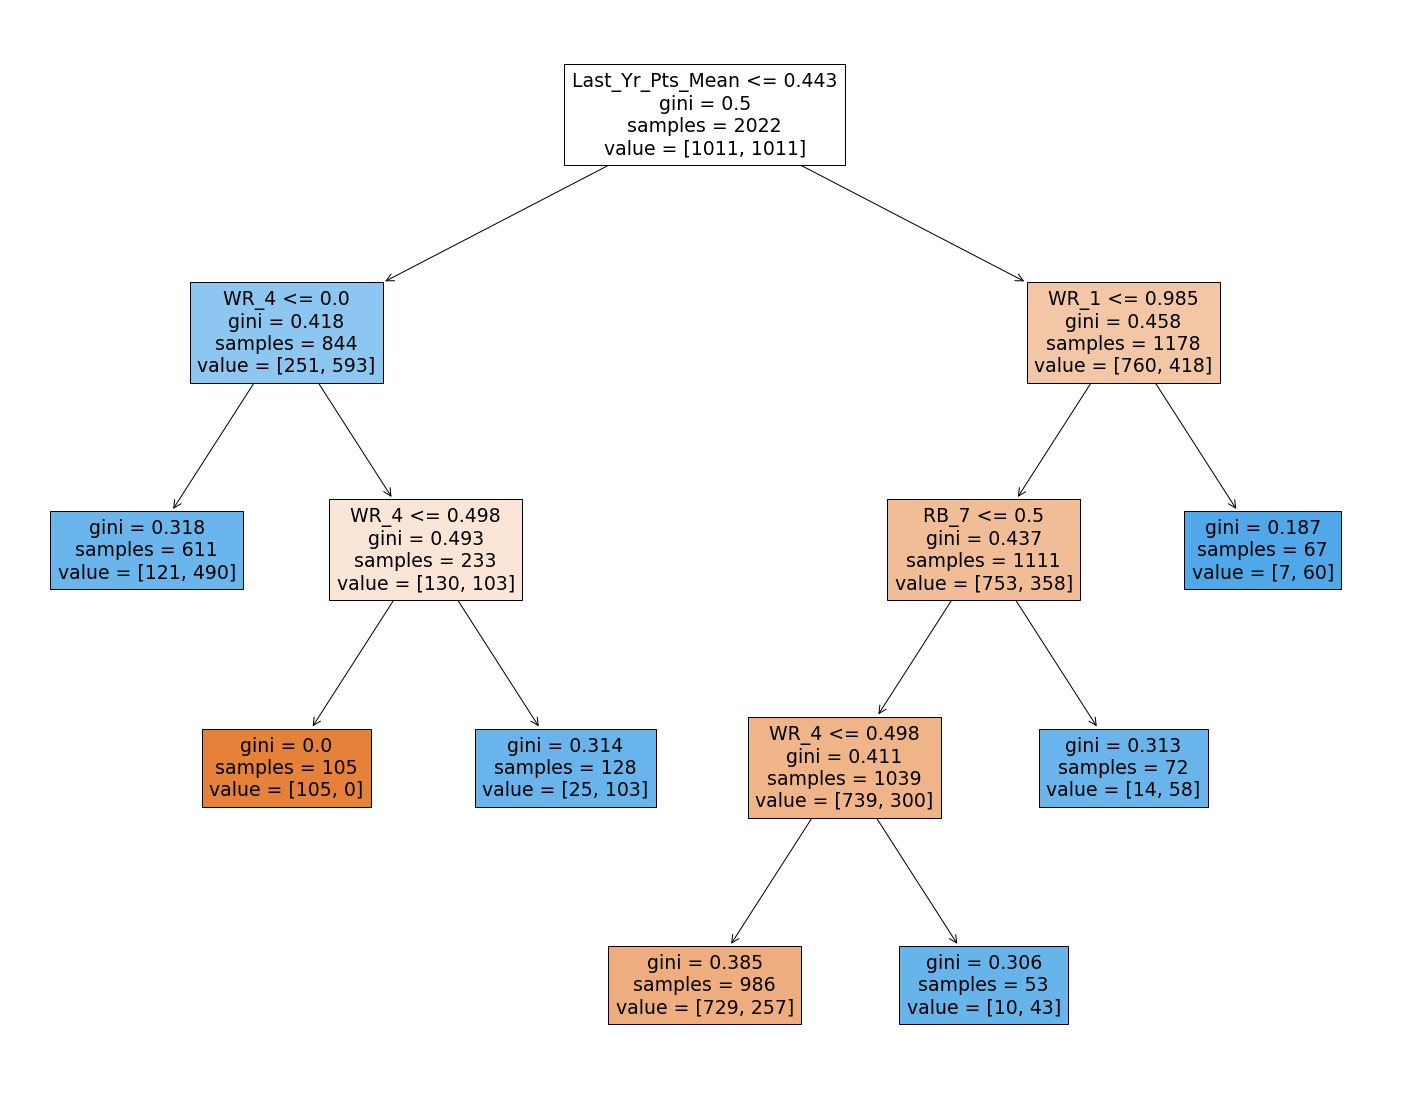

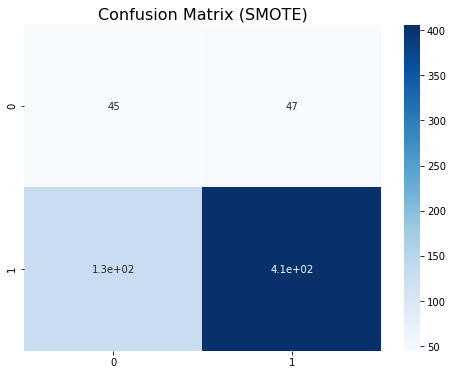

In [24]:
### Set train and test
xtrain,xtest,ytrain,ytest = train_test_split(Xval,Yval, test_size = 0.35, random_state = 23)

### SMOTE THE DATA
X2, Y2 = os.fit_resample(Xval, Yval)
X2 = pd.DataFrame(data=X2,columns=Using)
Y2 = pd.DataFrame(data=Y2,columns=['Not_Impactful'])

osX,osY = os.fit_resample(xtrain, Y_train)
osX = pd.DataFrame(data=osX,columns=Using)
osY= pd.DataFrame(data=osY,columns=['Not_Impactful'])
ytestDF = pd.DataFrame(data = ytest, columns = ['Not_Impactful'])

### Scale the Data
### Find columns to scale (Above 1)
to_scale = [col for col in osX.columns if osX[col].max() > .99]
to_scale2 = [col for col in X2.columns if X2[col].max() > .99]

## Set Scale
scaler = MinMaxScaler()

### Scale the Data
scaled = scaler.fit_transform(osX[to_scale])
scaled2 = scaler.fit_transform(X2[to_scale2])

### See the difference in Y values
print('Percent of Not_Impactful in Ytrain:',np.round(osY.value_counts(normalize = True)[1]*100,2))
print('Percent of Not_Impactful in Ytest:', np.round(ytestDF.value_counts(normalize = True)[1]*100,2))

### Decide the Model
Model = DecisionTreeClassifier(random_state = 15, max_leaf_nodes = 7)
result = Model.fit(scaled, osY.values.ravel())

# Predict values
predicted = Model.predict(xtest)

# Show accuracy 
print('Accuracy with Train_Test:', metrics.accuracy_score(ytest, predicted))
fig = plt.figure(figsize=(25,20))
tree.plot_tree(result, feature_names = Using,filled=True)

# Create CV
cv = RepeatedStratifiedKFold(n_splits=107, n_repeats=4, random_state=15)
scores = cross_val_score(Model, scaled2, Y2, scoring='accuracy', cv= 10)
print('Accuracy with CV:',scores.mean())

### Confusion MAtrix
cm = confusion_matrix(ytest, predicted)
print('\n',classification_report(ytest,predicted))
print('\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

## KNN - Scaled and SMOTE:

This is the last model run and the results are:

- TrainTest: 65% - Similar
- CV: 67% - Similar
- CM Precision - 1 :93% - Similar
- CM Precision - 0 : 26% - Similar
- CM Recall - 1 : 71% - BETTER
- CM Recall - 0 : 65% - BETTER
- CM F1 Score - 1 : 76% - Similar
- CM F1 Score - 0 :38% - Similar

This model is better than the previous KNN model but the Logistic Regression with SMOTE and scaled is better.

Percent of Not_Impactful in Ytrain: 50.0
Percent of Not_Impactful in Ytest: 85.33
Accuracy without CV: 0.6555023923444976
Accuracy with CV:  0.6727341058565612

               precision    recall  f1-score   support

           0       0.26      0.71      0.38        92
           1       0.93      0.65      0.76       535

    accuracy                           0.66       627
   macro avg       0.59      0.68      0.57       627
weighted avg       0.83      0.66      0.71       627


 [[ 65  27]
 [189 346]]


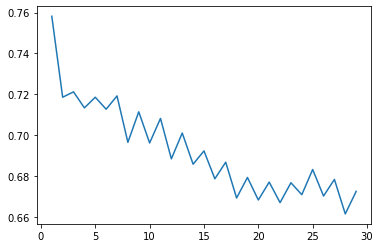

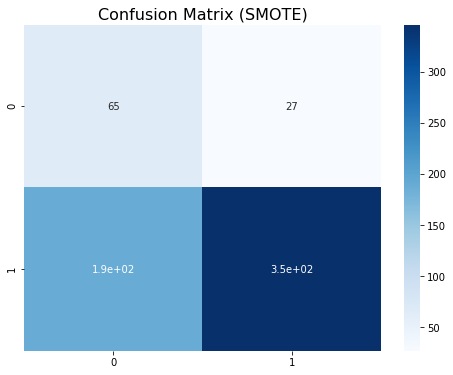

In [25]:
# # set train and test
xtrain, xtest, ytrain, ytest = train_test_split(Xval, Yval, test_size=0.35, random_state=23)

### SMOTE THE DATA
X2, Y2 = os.fit_resample(Xval, Yval)
X2 = pd.DataFrame(data=X2,columns=Using)
Y2 = pd.DataFrame(data=Y2,columns=['Not_Impactful'])

osX,osY = os.fit_resample(xtrain, ytrain)
osX = pd.DataFrame(data=osX,columns=Using)
osY= pd.DataFrame(data=osY,columns=['Not_Impactful'])
ytestDF = pd.DataFrame(data = ytest, columns = ['Not_Impactful'])

### Scale the Data
### Find columns to scale (Above 1)
to_scale = [col for col in osX.columns if osX[col].max() > .99]
to_scale2 = [col for col in X2.columns if X2[col].max() > .99]

## Set Scale
scaler = MinMaxScaler()

### Scale the Data
scaled = scaler.fit_transform(osX[to_scale])
scaled2 = scaler.fit_transform(X2[to_scale2])

### See the difference in Y values
print('Percent of Not_Impactful in Ytrain:',np.round(osY.value_counts(normalize = True)[1]*100,2))
print('Percent of Not_Impactful in Ytest:', np.round(ytestDF.value_counts(normalize = True)[1]*100,2))

## USE KNN MODEL
Model = KNeighborsClassifier(n_neighbors = 1)
Model.fit(scaled, osY.values.ravel())
y_pred = Model.predict(xtest)
print('Accuracy without CV:',metrics.accuracy_score(ytest, y_pred))

### Make scaled2 a DF
scaled2 = pd.DataFrame(scaled2, columns = Using)


## With CV
crossKnn = cross_val_score(knn, scaled2.values, Y2.values.ravel(), cv = 10, scoring = 'accuracy')
print('Accuracy with CV: ',crossKnn.mean())

## Plot to find optimal neighbors
kRange = range(1,30)
kscore = []

for value in kRange:
    knn = KNeighborsClassifier(n_neighbors = value)
    crossKnn = cross_val_score(knn, scaled2, Y2.values.ravel(), cv = 10, scoring = 'accuracy')
    kscore.append(crossKnn.mean())

plt.plot(kRange, kscore)

cm = confusion_matrix(ytest, y_pred)
print('\n',classification_report(ytest,y_pred))
print('\n',cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

# Conclusion - Wrap Up:

**In short, the best model is a SMOTE Scaled Logistic Regression Model. This produces the best 0 F1 Score and Recall which is our desired conclusion.** Though it is worse accuracy overall, that is because we are including more Not Impactful as Impactful. As stated above, this is a better tactic as we can easily identify poor performers once the season begins, but we will also have more impactful performers. This also means less impactful performers will be on other teams which will also improve ones overall chance at money. While other people are guessing at which players will be good picks, and thus choosing at a 13% rate, we will use our model and choose at a **25% accuracy rate, but with only a chance of 20% that our opponents will get a player.** They on the other hand have a 13% chance at being right, but also are giving us a good player 85% of the time.

<br>

If we wanted to improve our model and results, I would suggest modeling for only each position by making 5 different data frames. This though, we may not have enough data so that is also something that can be done to improve our model, add more years of data.

<br>

This concludes our attempt to predict an Impactful player based on drafted players alone and not talent of drafted players. For future research it may be wise to combine the talent of the drafted player with all that is drafted to get a better outcome.
